#                          Analysis of Real Estate Sales in Conneticut 

##### Collaborators: Arin Zeng, Helen Gu, Jennifer Li, Jason Chen
<hr>

# Introduction

The main purpose of this project is to take you through the entire pipeline of a data science journey. We will focus on how unemployment rates, interest rates, location, among other factors, affect the sales ratio of real estate homes in Connecticut. Amidst a nation where the population is rapidly growing, homes and other real-estate properties are increasing in demand while becoming a more popular investment area. The real-estate market can appear to be a world of mystery, and intimidating to navigate. As a home-buyer, you want to understand the factors to weigh in to purchase or invest in real-estate; as a home-seller, you want to understand the factors to weigh in to sell your real-estate. We want to appeal to these two audiences in particular, as we work to uncover the mystery surrounding the real-estate market. We will be focusing on data sets specific to Connecticut, but our tutorial will easily be applicable to studying the real-estate market in other states. 


The purpose of this tutorial is to analyze factors that affect sales ratio in the real-estate market, and examine its relationship with real-estate sales and profits. We will explore various methods of graphing and visualizing possible relationships and trends in the data to better understand the factors that impact the real-estate market. Data science is a perfect tool for this task because it allows us to easily unpack and organize messy and complicated data to synthesize more digestible descriptions of the real-estate market that market participants can refer to in their daily decisions.

### Imports

In [65]:
# import necessary libraries
import pandas as pd
from sodapy import Socrata
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Collection: Real Estate Sales                                

The data science pipeline begins with collecting data for analysis. We first extract data from a [dataset of Real estate sales](https://data.ct.gov/Housing-and-Development/Real-Estate-Sales-2001-2020-GL/5mzw-sjtu) in Connecticut from the years 2001-2020, provided by Connecticut Open Data. This data provides insight into the sales prices of homes, what their assessed value was, when they were sold, what the sales ratio was, and more. To retrieve the data, we use an api client to get the records and store them into a dataframe for further processing. 

!! Only run once !! <br>
!! Start !!

In [ ]:
#!/usr/bin/env python

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.ct.gov", None)

# Returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("5mzw-sjtu", limit=1000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head()

Since the original dataset consists of over 990k data points, the data takes much too long to filter and process, so we can take a sampling of the data by selecting every hundredth row in order to reduce the size of the dataset. Then the data is stored into a csv for ease of future analysis.

In [329]:
df = results_df.iloc[::100]
df.to_csv("conn_real_estate_sample.csv", index=False)

!! End !!

In [432]:
results_df = pd.read_csv("data/conn_real_estate_sample.csv")
results_df

serialnumber  listyear             daterecorded       town   
0            20001      2020  2020-10-05T00:00:00.000    Andover  \
1          2020072      2020  2020-11-25T00:00:00.000    Ansonia   
2          2020221      2020  2021-05-25T00:00:00.000    Ansonia   
3          2020361      2020  2021-09-21T00:00:00.000    Ansonia   
4           200047      2020  2020-10-23T00:00:00.000       Avon   
...            ...       ...                      ...        ...   
7071         10011      2001  2001-10-05T00:00:00.000   Woodbury   
7072         10239      2001  2002-04-02T00:00:00.000   Woodbury   
7073         10158      2001  2002-07-19T00:00:00.000   Woodbury   
7074         10067      2001  2001-12-31T00:00:00.000  Woodstock   
7075         10211      2001  2002-08-07T00:00:00.000  Woodstock   

                  address  assessedvalue  saleamount  salesratio propertytype   
0             303 LAKE RD         121300    210000.0    0.577600  Residential  \
1       7 JASON WRIGHT DR         172500    330000.0    0.522700  Residential   
2          8 BERKSHIRE RD         108300    245000.0    0.442000  Residential   
3          5 BIRCHWOOD DR         203700    335000.0    0.608000  Residential   
4          21 CLIFF DRIVE         155390    249000.0    0.624000  Residential   
...                   ...            ...         ...         ...          ...   
7071     57 OLD GRASSY HL         190630    418962.0    0.455005          NaN   
7072  86 29 WASHINGTON RD          36580     80000.0    0.457250          NaN   
7073       58 SHERMAN HTS          96370    240000.0    0.401542          NaN   
7074     12 WAINWRIGHT DR          67930    146000.0    0.465274          NaN   
7075           564 RT 198         117550    199500.0    0.589223          NaN   

     residentialtype                                    geo_coordinates   
0      Single Family  {'type': 'Point', 'coordinates': [-72.35327, 4...  \
1      Single Family                                                NaN   
2      Single Family                                                NaN   
3      Single Family                                                NaN   
4      Single Family  {'type': 'Point', 'coordinates': [-72.87619, 4...   
...              ...                                                ...   
7071             NaN                                                NaN   
7072             NaN                                                NaN   
7073             NaN                                                NaN   
7074             NaN                                                NaN   
7075             NaN  {'type': 'Point', 'coordinates': [-72.07593, 4...   

      :@computed_region_dam5_q64j  :@computed_region_nhmp_cq6b   
0                            38.0                        246.0  \
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          NaN   
4                          1041.0                         46.0   
...                           ...                          ...   
7071                          NaN                          NaN   
7072                          NaN                          NaN   
7073                          NaN                          NaN   
7074                          NaN                          NaN   
7075                         39.0                         72.0   

      :@computed_region_m4y2_whse  :@computed_region_snd5_k6zv  nonusecode   
0                             1.0                          1.0         NaN  \
1                             NaN                          NaN         NaN   
2                             NaN                          NaN         NaN   
3                             NaN                          NaN         NaN   
4                             4.0                          1.0         NaN   
...                           ...                     

## Data Processing: Real Estate Sales

Now that we have the data, our next step is to clean up our data in order to get rid of unnecessary columns or rows, as well as extraneous values. Looking at the table, there are multiple columns that don't quite seem to make sense as well as columns that have little effect on our analysis such as serial number, computed regions, and remarks. So we can go ahead and drop these columns from our dataframe since we don't need them going forward. Within some columns, there is also data where all the information is included, but it is formatted in a way that is difficult for us to process or includes extra data. For example, the date recorded field includes the time of the record as well; however it appears to be 00:00:00 for every entry and since it is the date that we are looking at, the time is not pertinent to this field, so we can strip the time from the date field to clean it up. We also separate out the year and the month into new fields of their own for more general analysis. 

In [67]:
df = results_df.drop(columns = ['serialnumber', 
                      ':@computed_region_dam5_q64j', ':@computed_region_nhmp_cq6b', 
                      ':@computed_region_m4y2_whse', ':@computed_region_snd5_k6zv',
                     'remarks', 'opm_remarks'])

df['daterecorded'] = df['daterecorded'].str[:10]
df['Year'] = pd.to_datetime(df['daterecorded'], format="%Y-%m-%d").dt.strftime('%Y')
df['Month'] = pd.to_datetime(df['daterecorded'], format="%Y-%m-%d").dt.strftime('%m')
df

listyear daterecorded       town              address  assessedvalue   
0         2020   2020-10-05    Andover          303 LAKE RD         121300  \
1         2020   2020-11-25    Ansonia    7 JASON WRIGHT DR         172500   
2         2020   2021-05-25    Ansonia       8 BERKSHIRE RD         108300   
3         2020   2021-09-21    Ansonia       5 BIRCHWOOD DR         203700   
4         2020   2020-10-23       Avon       21 CLIFF DRIVE         155390   
...        ...          ...        ...                  ...            ...   
7071      2001   2001-10-05   Woodbury     57 OLD GRASSY HL         190630   
7072      2001   2002-04-02   Woodbury  86 29 WASHINGTON RD          36580   
7073      2001   2002-07-19   Woodbury       58 SHERMAN HTS          96370   
7074      2001   2001-12-31  Woodstock     12 WAINWRIGHT DR          67930   
7075      2001   2002-08-07  Woodstock           564 RT 198         117550   

      saleamount  salesratio propertytype residentialtype   
0       210000.0    0.577600  Residential   Single Family  \
1       330000.0    0.522700  Residential   Single Family   
2       245000.0    0.442000  Residential   Single Family   
3       335000.0    0.608000  Residential   Single Family   
4       249000.0    0.624000  Residential   Single Family   
...          ...         ...          ...             ...   
7071    418962.0    0.455005          NaN             NaN   
7072     80000.0    0.457250          NaN             NaN   
7073    240000.0    0.401542          NaN             NaN   
7074    146000.0    0.465274          NaN             NaN   
7075    199500.0    0.589223          NaN             NaN   

                                        geo_coordinates  nonusecode  Year   
0     {'type': 'Point', 'coordinates': [-72.35327, 4...         NaN  2020  \
1                                                   NaN         NaN  2020   
2                                                   NaN         NaN  2021   
3                                                   NaN         NaN  2021   
4     {'type': 'Point', 'coordinates': [-72.87619, 4...         NaN  2020   
...                                                 ...         ...   ...   
7071                                                NaN         NaN  2001   
7072                                                NaN         NaN  2002   
7073                                                NaN         NaN  2002   
7074                                                NaN         NaN  2001   
7075  {'type': 'Point', 'coordinates': [-72.07593, 4...         NaN  2002   

     Month  
0       10  
1       11  
2       05  
3       09  
4       10  
...    ...  
7071    10  
7072    04  
7073    07  
7074    12  
7075    08  

[7076 rows x 13 columns]

Another step we can take is to separate out the x and y coordinates for the geo coordinates field. The geo coordinates field also has encoded all necessary information; however, the formatting of the field makes it difficult for us to directly examine the coordinate information. So in order to extract the coordinate information, we can use string operations to extract the x and y coordinates, which are placed into their own respective fields. This way, we can better examine where the coordinates of a specific record belong. 

In [68]:
df['coord'] = df['geo_coordinates'].astype(str).str.extract('\[(.*?)\]', expand=False).str.strip()
df[['x_coord','y_coord']] = df.coord.str.split(", ",expand=True).astype(float)
df = df.drop(columns = ['geo_coordinates', 'coord'])
df.head()

listyear daterecorded     town            address  assessedvalue   
0      2020   2020-10-05  Andover        303 LAKE RD         121300  \
1      2020   2020-11-25  Ansonia  7 JASON WRIGHT DR         172500   
2      2020   2021-05-25  Ansonia     8 BERKSHIRE RD         108300   
3      2020   2021-09-21  Ansonia     5 BIRCHWOOD DR         203700   
4      2020   2020-10-23     Avon     21 CLIFF DRIVE         155390   

   saleamount  salesratio propertytype residentialtype  nonusecode  Year   
0    210000.0      0.5776  Residential   Single Family         NaN  2020  \
1    330000.0      0.5227  Residential   Single Family         NaN  2020   
2    245000.0      0.4420  Residential   Single Family         NaN  2021   
3    335000.0      0.6080  Residential   Single Family         NaN  2021   
4    249000.0      0.6240  Residential   Single Family         NaN  2020   

  Month   x_coord   y_coord  
0    10 -72.35327  41.71416  
1    11       NaN       NaN  
2    05       NaN       NaN  
3    09       NaN       NaN  
4    10 -72.87619  41.80986

An important part of examining the data is also to look at the distribution of data to make sure that our data has a good distribution of records and also doesn't include any extraneous values. This we can see in a summary of the dataframe seen below. Most of the data appears to be normal; however, in our sales ratio, there is clearly a max value that lies far beyond the range of the other sales ratio values. We can confirm that it is an outlier by calculating the third quartile + (1.5 * IQR) which gives us an upper fence where outliers would lie beyond. The third quartile + (1.5 * IQR) is equal to 0.70 + 1.5(0.70 - 0.49) = 1.015, so it is evident that this data point, the max of 7.9 is an outlier and we can remove it from the dataset and also use this upper fence to filter out unreasonably high values.

In [69]:
df.describe()

listyear  assessedvalue    saleamount   salesratio  nonusecode   
count  7076.000000   7.076000e+03  7.076000e+03  7076.000000         0.0  \
mean   2009.954211   2.306462e+05  3.838914e+05     0.606059         NaN   
std       6.366022   4.231461e+05  7.206351e+05     0.195015         NaN   
min    2001.000000   0.000000e+00  0.000000e+00     0.000000         NaN   
25%    2004.000000   9.281500e+04  1.670000e+05     0.485414         NaN   
50%    2009.000000   1.449950e+05  2.470000e+05     0.597535         NaN   
75%    2016.000000   2.329325e+05  3.821250e+05     0.704150         NaN   
max    2020.000000   1.540000e+07  2.489893e+07     7.915833         NaN   

           x_coord      y_coord  
count  1403.000000  1403.000000  
mean    -72.887949    41.485677  
std       0.428388     0.258001  
min     -73.671740    41.012320  
25%     -73.221735    41.280930  
50%     -72.907140    41.483920  
75%     -72.634795    41.709425  
max     -71.810420    42.033330

In [433]:
df = df[df['salesratio'] < 1.015]
df

listyear daterecorded          town               address   
0         2020   2020-10-05       Andover           303 LAKE RD  \
1         2020   2020-10-23          Avon        21 CLIFF DRIVE   
2         2020   2020-10-09  Beacon Falls       19 SUSAN STREET   
3         2020   2020-10-13        Bethel    57 CHESTNUT STREET   
4         2020   2020-10-21      Branford        2E ANCHOR REEF   
...        ...          ...           ...                   ...   
7069      2001   2002-03-20    Torrington  616 MIGEON AVE UT 10   
7070      2001   2002-03-25      Trumbull       6 PEPPERIDGE RD   
7071      2001   2002-03-01      Westport       92 NEWTOWN TPKE   
7072      2001   2002-03-11  Wethersfield          703 RIDGE RD   
7073      2001   2002-03-27    Woodbridge   27 RICHARD SWEET DR   

      assessedvalue  saleamount  salesratio propertytype residentialtype   
0            121300    210000.0    0.577600  Residential   Single Family  \
1            155390    249000.0    0.624000  Residential   Single Family   
2             32640     45000.0    0.725300  Residential   Single Family   
3            194110    365000.0    0.531800  Residential   Single Family   
4            256000    480000.0    0.533300  Residential           Condo   
...             ...         ...         ...          ...             ...   
7069          17100     32900.0    0.519757          NaN             NaN   
7070         168500    309900.0    0.543724          NaN             NaN   
7071         385900    635000.0    0.607717          NaN             NaN   
7072         131400    245000.0    0.536327          NaN             NaN   
7073         307650    439000.0    0.700797          NaN             NaN   

      nonusecode  Year Month   x_coord   y_coord  UnemploymentRate primeRate  
0            NaN  2020    10 -72.35327  41.71416               7.9      3.25  
1            NaN  2020    10 -72.87619  41.80986               7.9      3.25  
2            NaN  2020    10       NaN       NaN               7.9      3.25  
3            NaN  2020    10 -73.40632  41.36916               7.9      3.25  
4            NaN  2020    10 -72.67344  41.72606               7.9      3.25  
...          ...   ...   ...       ...       ...               ...       ...  
7069         NaN  2002     3       NaN       NaN               3.9      4.75  
7070         NaN  2002     3       NaN       NaN               3.9      4.75  
7071         NaN  2002     3       NaN       NaN               3.9      4.75  
7072         NaN  2002     3       NaN       NaN               3.9      4.75  
7073         NaN  2002     3       NaN       NaN               3.9      4.75  

[6953 rows x 16 columns]

## Data Collection: Interest Rates

In order to better gauge factors that affect real estate sales, we can take a look at historical interest rates and how they fit in with our real estate data. Since interest rates commonly affect the market and how people buy and sell, it can be useful to examine interest rates in relation to the real estate sales to determine what kind of relationship exists interest rates and real estate sales. 

Another method of acquiring data is to scrape it from websites. Since First Republic provides a table of historical interest rates on their website, we can scrape the interest rates off their website using webscraping libraries like selenium and BeautifulSoup. Once the html from the page has been scraped, we can then parse the html to identify the table and pick out the data that we need from the table. Web scraping is a useful technique for gathering data from websites online where the dataset may not be available to download and is commonly used for data collection. Check out more information on webscraping using selenium and BeautifulSoup [here](https://medium.com/ymedialabs-innovation/web-scraping-using-beautiful-soup-and-selenium-for-dynamic-page-2f8ad15efe25#:~:text=The%20combination%20of%20Beautiful%20Soup,be%20extracted%20by%20Beautiful%20Soup).

In [71]:
url = "https://www.firstrepublic.com/finmkts/historical-interest-rates"

# initiating the webdriver. Parameter includes the path of the webdriver.
driver = webdriver.Chrome('./chromedriver') 
driver.get(url) 
  
# this is just to ensure that the page is loaded
time.sleep(5) 
  
html = driver.page_source
  
# this renders the JS code and stores all
# of the information in static HTML code.
  
# Now, we could simply apply bs4 to html variable
soup = BeautifulSoup(html, "html.parser")

/var/folders/04/hdjfckkd4fd__5521d_kggjh0000gn/T/ipykernel_53103/1535766723.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver')


WebDriverException: Message: unknown error: cannot find Chrome binary
Stacktrace:
0   chromedriver                        0x000000010042b8ac chromedriver + 4257964
1   chromedriver                        0x0000000100423f40 chromedriver + 4226880
2   chromedriver                        0x00000001000609d4 chromedriver + 281044
3   chromedriver                        0x0000000100087778 chromedriver + 440184
4   chromedriver                        0x0000000100085c38 chromedriver + 433208
5   chromedriver                        0x00000001000c33dc chromedriver + 685020
6   chromedriver                        0x00000001000c2c08 chromedriver + 683016
7   chromedriver                        0x000000010008f98c chromedriver + 473484
8   chromedriver                        0x000000010009098c chromedriver + 477580
9   chromedriver                        0x00000001003ea900 chromedriver + 3991808
10  chromedriver                        0x00000001003ee354 chromedriver + 4006740
11  chromedriver                        0x00000001003ee940 chromedriver + 4008256
12  chromedriver                        0x00000001003f433c chromedriver + 4031292
13  chromedriver                        0x00000001003eef34 chromedriver + 4009780
14  chromedriver                        0x00000001003c7490 chromedriver + 3847312
15  chromedriver                        0x000000010040c9f4 chromedriver + 4131316
16  chromedriver                        0x000000010040cb4c chromedriver + 4131660
17  chromedriver                        0x000000010041d230 chromedriver + 4198960
18  libsystem_pthread.dylib             0x000000018708826c _pthread_start + 148
19  libsystem_pthread.dylib             0x000000018708308c thread_start + 8


In [435]:
# find all table tag in the html
table = soup.find_all("table")

# take the third table tag and isolate only the necessary data and divide
# the data into rows
arr = str(table[2]).split("<tbody>")
arr = arr[1].split("\n")
arr = arr[-2].split("<tr>")
arr = arr[1:]

# make a dataframe
df1 = pd.DataFrame(arr)

# iterate over the dataframe
for i, row in df1.iterrows():
    # split the entries
    arr = row[0].split("<td>")

    # get the month/year value
    date = arr[1][:-5]

    # break if outside of our date range
    if date[-4:] == '2000':
        break
    
    # get the interest rate
    prime_rate = float(arr[4][:-11])

    # parse the date and split into year and month
    df1.at[i, 'Year'] = pd.to_datetime(date, format="%m/%Y").year
    df1.at[i, 'Month'] = pd.to_datetime(date, format="%m/%Y").month

    # set the interest rate
    df1.at[i, 'primeRate'] = prime_rate

# drop all na values and unnecessary columns
df1.dropna(inplace=True)
df1.drop(columns=[0], inplace=True)

# cast types
df1['Year'] = df1['Year'].astype(int)
df1['Month'] = df1['Month'].astype(int)

# write to csv
df_rate = df1.copy()
df_rate.to_csv("data/conn_interest_rate.csv", index=False)
df_rate



Year  Month  primeRate
0    2023      3       7.75
1    2023      2       7.75
2    2023      1       7.50
3    2022     12       7.00
4    2022     11       7.00
..    ...    ...        ...
262  2001      5       7.50
263  2001      4       7.50
264  2001      3       8.00
265  2001      2       8.50
266  2001      1       9.00

[267 rows x 3 columns]

In [436]:
# if web driver error
df_rate = pd.read_csv("data/conn_interest_rate.csv")

## Data Collection: Unemployment Rates

Another factor that appears to impact the real estate market is the state of the economy which correlates to unemployment rates. It is also possible that with higher unemployment rates, there will be less people who are financially capable of purchasing real estate, resulting in lower sales. To analyze whether a relationship truly exists between unemployment rates real estate sales, we first start by collecting data on unemployment rates. The U.S. Bureau of Labor Statistics provides a [dataset of labor statistics](https://data.bls.gov/pdq/SurveyOutputServlet) which we use below.

In [74]:
unemployment_df = pd.read_csv("data/conn_unemployment.csv")
unemployment_df.head()

Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0  2001  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.0  3.1  3.3  3.4  3.5
1  2002  3.6  3.8  3.9  4.1  4.2  4.3  4.5  4.6  4.8  4.9  5.0  5.1
2  2003  5.2  5.3  5.4  5.5  5.5  5.6  5.6  5.6  5.5  5.5  5.4  5.3
3  2004  5.3  5.3  5.2  5.2  5.2  5.1  5.1  5.0  5.0  4.9  4.9  4.9
4  2005  4.9  4.9  4.9  4.9  4.8  4.8  4.8  4.8  4.8  4.7  4.7  4.6

Looking at the data, we can see the current unemployment data is not tidy, because we do not fit the criteria for tidy data which includes the following principles:
1. Every column is a variable 
2. Every row is an observation
3. Every cell is a single value
 
To tidy our unemployment data, we need to convert our columns into rows. This can be done in an process called melting which makes it so that the months become values and we end up with the year, month, and unemployment rate as columns. To learn more about tidy data click [here](http://vita.had.co.nz/papers/tidy-data.pdf).

In [75]:
# identify the columns of the dataframe
unemployment_df.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [76]:
# melt the dataframe
unemployment_df = pd.melt(unemployment_df, 
        id_vars=['Year'], 
        value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
                    'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        var_name='Month', 
        value_name='UnemploymentRate')

# drop na values
unemployment_df.dropna(inplace=True)
unemployment_df.head()


Year Month  UnemploymentRate
0  2001   Jan               2.3
1  2002   Jan               3.6
2  2003   Jan               5.2
3  2004   Jan               5.3
4  2005   Jan               4.9

In [77]:
# array of months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
                    'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# format the year and month into datetime objects
for i, row in unemployment_df.iterrows():
    unemployment_df.at[i, 'Year'] = pd.to_datetime(row['Year'], format="%Y").year
    unemployment_df.at[i, 'Month'] = pd.to_datetime((int(months.index(row['Month'])) + 1), format="%m").month

unemployment_df.head()

Year Month  UnemploymentRate
0  2001     1               2.3
1  2002     1               3.6
2  2003     1               5.2
3  2004     1               5.3
4  2005     1               4.9

Now that we have retrieved real estate sales data, interest rate data, and unemployment rate data, we can combine all the datasets into one dataset, where we compare the year and the month to insert the correct unemployment rate and interest rate. To do this, we can perform a join using the pandas merge function and join on the columns year and month, since those are the columns that we want to be cross referenced when merging the datasets. Joining datasets is an essential part of being able to compare data across different datasets. Learn more about joins [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html).

In [437]:
# drop na values
df_copy = df.copy().dropna(subset=['Year', 'Month'])
df_copy['Year'] = df_copy['Year'].astype(int)
df_copy['Month'] = df_copy['Month'].astype(int)


# join the real estate data and unemployment data
df_merge = pd.merge(df_copy, unemployment_df, on=['Year', 'Month'])
df_merge

listyear daterecorded          town               address   
0         2020   2020-10-05       Andover           303 LAKE RD  \
1         2020   2020-10-23          Avon        21 CLIFF DRIVE   
2         2020   2020-10-09  Beacon Falls       19 SUSAN STREET   
3         2020   2020-10-13        Bethel    57 CHESTNUT STREET   
4         2020   2020-10-21      Branford        2E ANCHOR REEF   
...        ...          ...           ...                   ...   
6948      2001   2002-03-20    Torrington  616 MIGEON AVE UT 10   
6949      2001   2002-03-25      Trumbull       6 PEPPERIDGE RD   
6950      2001   2002-03-01      Westport       92 NEWTOWN TPKE   
6951      2001   2002-03-11  Wethersfield          703 RIDGE RD   
6952      2001   2002-03-27    Woodbridge   27 RICHARD SWEET DR   

      assessedvalue  saleamount  salesratio propertytype residentialtype   
0            121300    210000.0    0.577600  Residential   Single Family  \
1            155390    249000.0    0.624000  Residential   Single Family   
2             32640     45000.0    0.725300  Residential   Single Family   
3            194110    365000.0    0.531800  Residential   Single Family   
4            256000    480000.0    0.533300  Residential           Condo   
...             ...         ...         ...          ...             ...   
6948          17100     32900.0    0.519757          NaN             NaN   
6949         168500    309900.0    0.543724          NaN             NaN   
6950         385900    635000.0    0.607717          NaN             NaN   
6951         131400    245000.0    0.536327          NaN             NaN   
6952         307650    439000.0    0.700797          NaN             NaN   

      nonusecode  Year Month   x_coord   y_coord  UnemploymentRate_x   
0            NaN  2020    10 -72.35327  41.71416                 7.9  \
1            NaN  2020    10 -72.87619  41.80986                 7.9   
2            NaN  2020    10       NaN       NaN                 7.9   
3            NaN  2020    10 -73.40632  41.36916                 7.9   
4            NaN  2020    10 -72.67344  41.72606                 7.9   
...          ...   ...   ...       ...       ...                 ...   
6948         NaN  2002     3       NaN       NaN                 3.9   
6949         NaN  2002     3       NaN       NaN                 3.9   
6950         NaN  2002     3       NaN       NaN                 3.9   
6951         NaN  2002     3       NaN       NaN                 3.9   
6952         NaN  2002     3       NaN       NaN                 3.9   

     primeRate  UnemploymentRate_y  
0         3.25                 7.9  
1         3.25                 7.9  
2         3.25                 7.9  
3         3.25                 7.9  
4         3.25                 7.9  
...        ...                 ...  
6948      4.75                 3.9  
6949      4.75                 3.9  
6950      4.75                 3.9  
6951      4.75                 3.9  
6952      4.75                 3.9  

[6953 rows x 17 columns]

In [81]:
# join the merged datasets and also the interest rate dataset
df_merge = pd.merge(df_merge, df_rate, on=['Year', 'Month'])
df_merge

listyear daterecorded          town               address   
0         2020   2020-10-05       Andover           303 LAKE RD  \
1         2020   2020-10-23          Avon        21 CLIFF DRIVE   
2         2020   2020-10-09  Beacon Falls       19 SUSAN STREET   
3         2020   2020-10-13        Bethel    57 CHESTNUT STREET   
4         2020   2020-10-21      Branford        2E ANCHOR REEF   
...        ...          ...           ...                   ...   
7069      2001   2002-03-20    Torrington  616 MIGEON AVE UT 10   
7070      2001   2002-03-25      Trumbull       6 PEPPERIDGE RD   
7071      2001   2002-03-01      Westport       92 NEWTOWN TPKE   
7072      2001   2002-03-11  Wethersfield          703 RIDGE RD   
7073      2001   2002-03-27    Woodbridge   27 RICHARD SWEET DR   

      assessedvalue  saleamount  salesratio propertytype residentialtype   
0            121300    210000.0    0.577600  Residential   Single Family  \
1            155390    249000.0    0.624000  Residential   Single Family   
2             32640     45000.0    0.725300  Residential   Single Family   
3            194110    365000.0    0.531800  Residential   Single Family   
4            256000    480000.0    0.533300  Residential           Condo   
...             ...         ...         ...          ...             ...   
7069          17100     32900.0    0.519757          NaN             NaN   
7070         168500    309900.0    0.543724          NaN             NaN   
7071         385900    635000.0    0.607717          NaN             NaN   
7072         131400    245000.0    0.536327          NaN             NaN   
7073         307650    439000.0    0.700797          NaN             NaN   

      nonusecode  Year Month   x_coord   y_coord  UnemploymentRate  primeRate  
0            NaN  2020    10 -72.35327  41.71416               7.9       3.25  
1            NaN  2020    10 -72.87619  41.80986               7.9       3.25  
2            NaN  2020    10       NaN       NaN               7.9       3.25  
3            NaN  2020    10 -73.40632  41.36916               7.9       3.25  
4            NaN  2020    10 -72.67344  41.72606               7.9       3.25  
...          ...   ...   ...       ...       ...               ...        ...  
7069         NaN  2002     3       NaN       NaN               3.9       4.75  
7070         NaN  2002     3       NaN       NaN               3.9       4.75  
7071         NaN  2002     3       NaN       NaN               3.9       4.75  
7072         NaN  2002     3       NaN       NaN               3.9       4.75  
7073         NaN  2002     3       NaN       NaN               3.9       4.75  

[7074 rows x 16 columns]

## Exploratory Analysis & Data Visualization

First, let's get a feel for exploring the various factors that may affect the sales ratio of real-estate units in Connecticut. We will explore the residential types of the units, creating a dataframe that shows the number of each residential type {Condo, Single Family, Two Family, Three Family, Four Family} for each town. To do so, we will need to create a unique list of residential types, capture the number of real-estate units that match each residential type, and create a new column to display the collective counts.

In [102]:
# Get a unique list of the residential types
cleanedList = [x for x in results_df.residentialtype.unique() if x == x]

# Create a dataframe with just the town and residential type columns
residential_df = results_df[['town','residentialtype']]

# Plus residential type counts for each town
count_resident_df = residential_df.groupby(['town','residentialtype']).size().reset_index(name='count')

# Shows the amount of each residential type for each town where each column is a residential type and another column for the town 
residential_df = count_resident_df.pivot_table(values='count', index='town', columns='residentialtype',fill_value=0)

print(residential_df)

residentialtype  Condo  Four Family  Single Family  Three Family  Two Family
town                                                                        
Andover              0            0              4             0           0
Ansonia              0            0             17             2           1
Ashford              0            0              4             0           1
Avon                11            0             29             0           0
Barkhamsted          0            0              1             0           0
...                ...          ...            ...           ...         ...
Windsor Locks        6            0             11             0           0
Wolcott              1            0              9             0           0
Woodbridge           0            0             13             0           0
Woodbury             5            0              6             0           0
Woodstock            0            0             12             0           0

Now that we've organized this data to show the number of each residential types for each town, let's make a graph to better visualize the data. We can make a bar graph to visualize the average sales ratio vs each residential type. We'll start by grouping entries with the same residential type, and aggregating their sales ratios to calculate their mean/average value.

<Axes: title={'center': 'Sales Ratio by Residential Type'}, xlabel='Town', ylabel='Sales Ratio'>

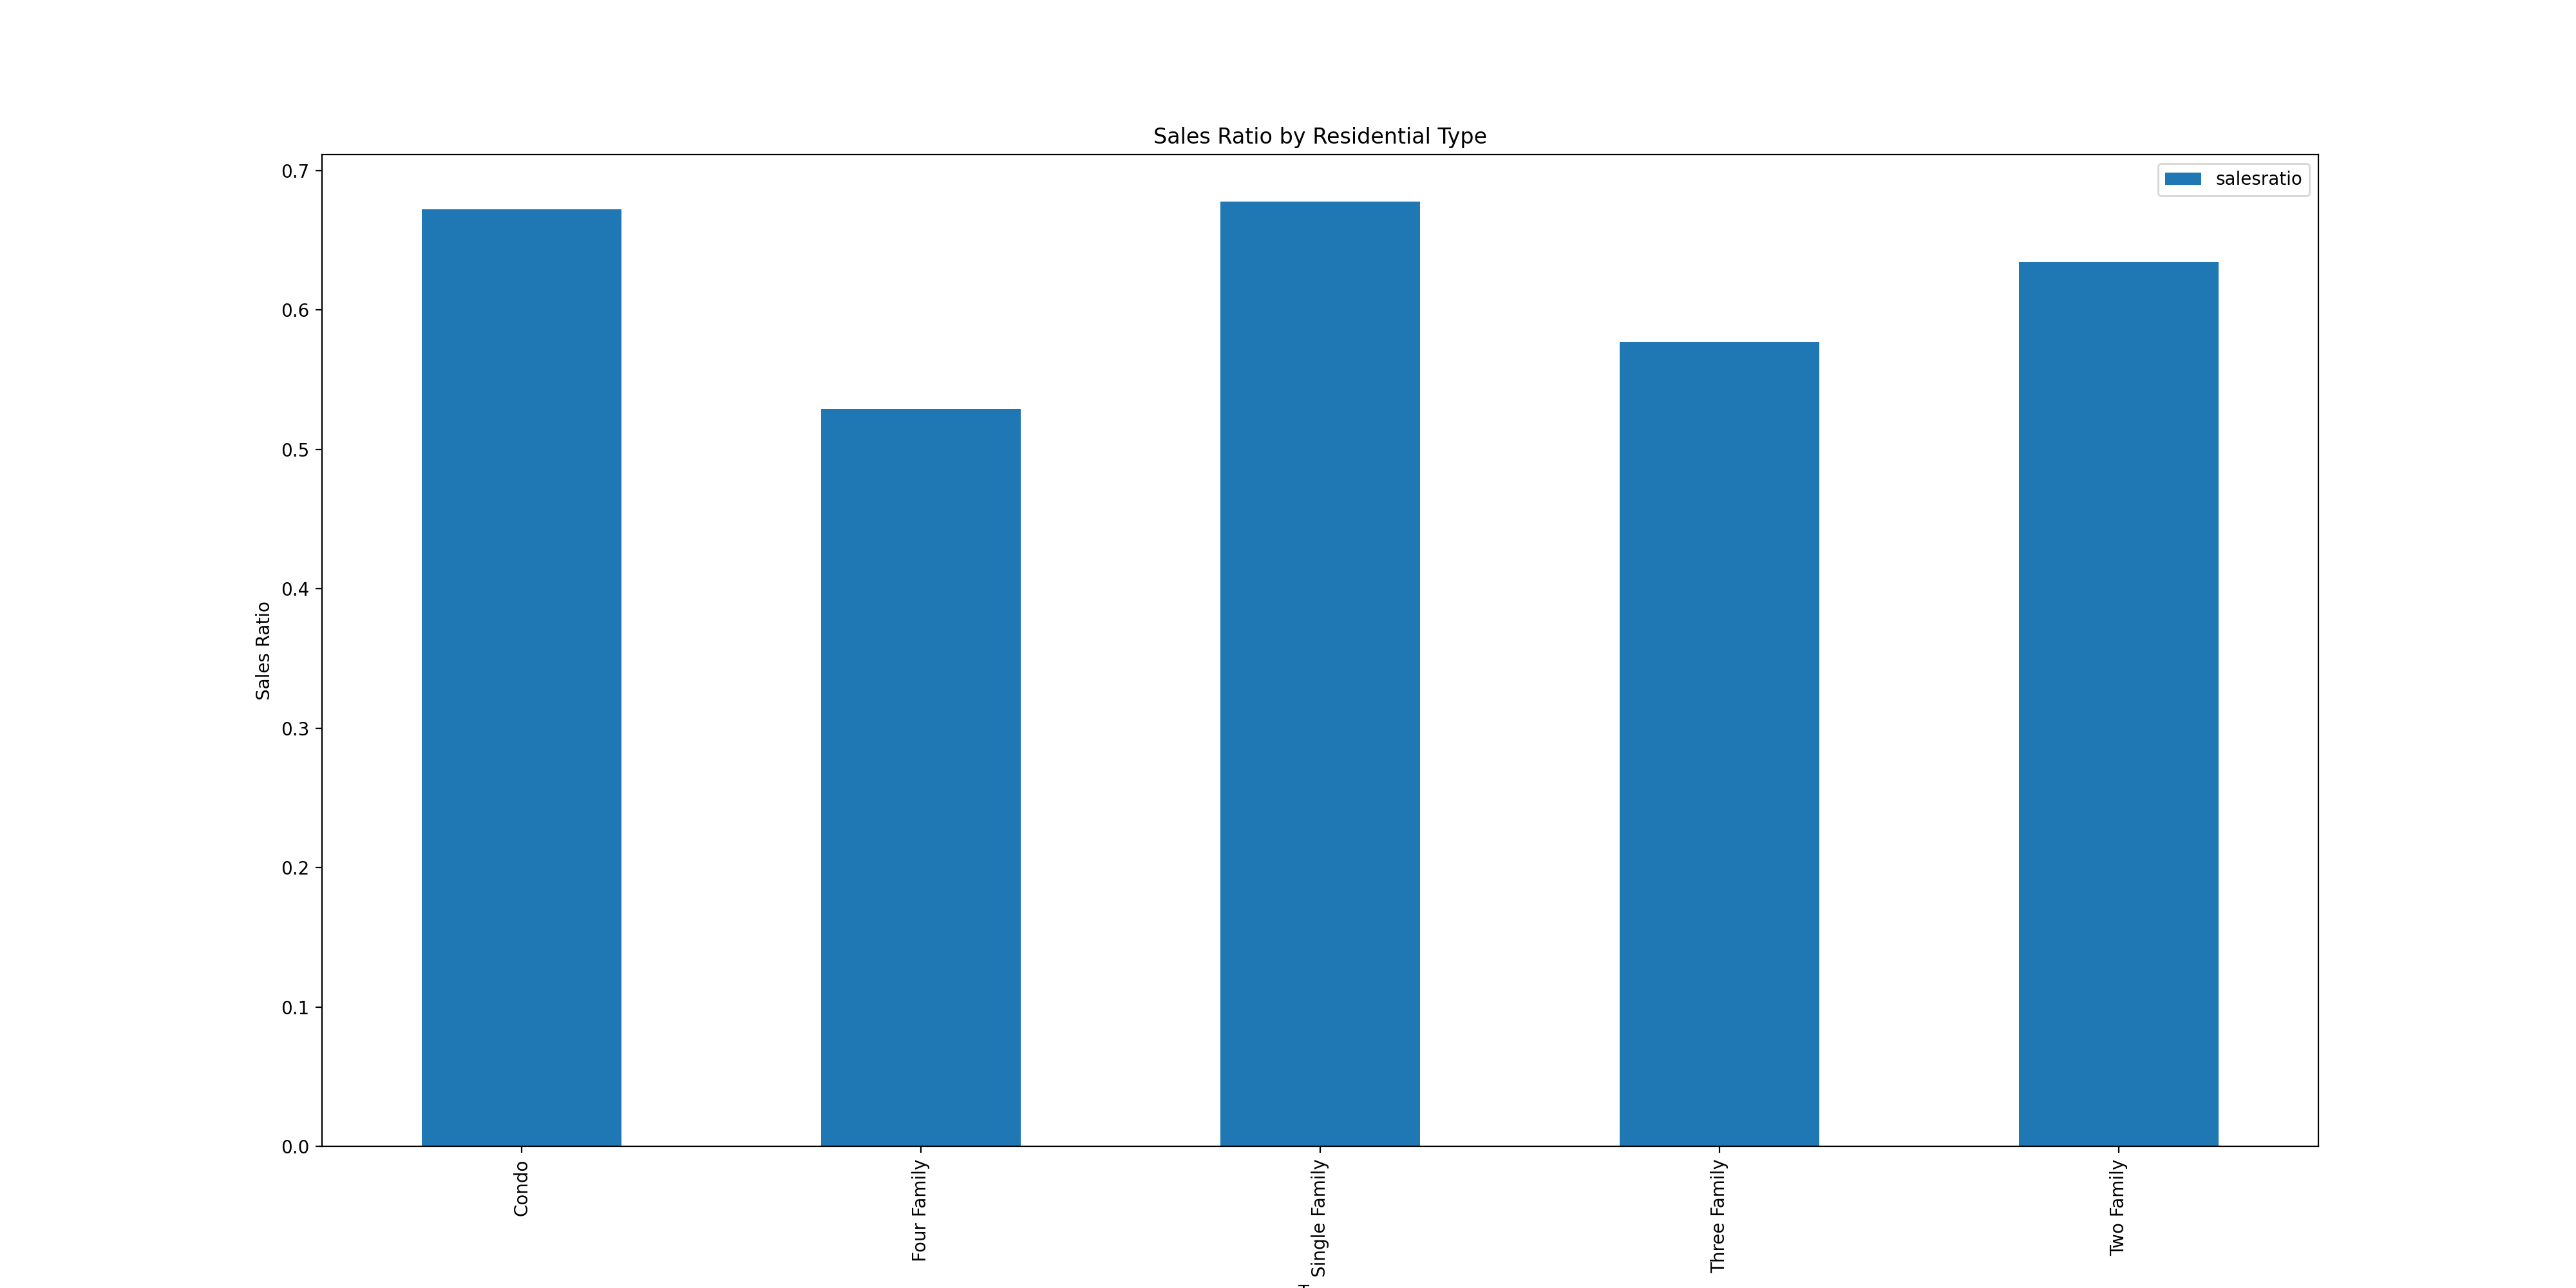

In [431]:
# real-estate unit entries grouped by their residential type vs and average sales ratio
residential_df = results_df.groupby('residentialtype').agg({'salesratio': 'mean'})

# made into a bar graph
residential_df.plot.bar(figsize=(20,10), title='Sales Ratio by Residential Type', ylabel='Sales Ratio', xlabel='Town')

As we can see from this bar graph, sales ratio falls consistently within a tight range of 0.53 and 0.68 across the five residential types, suggesting that there is a weak or no relationship between residential type and sales ratio. Moving forward, we can infer that residential type has little effect on sales ratio, and is a weak factor if at all for sales ratio.

Next, we will examine the relationship of location and the average sale ratio of homes. We will first make a bar graph of towns vs their average sales ratio, and then we will look at how sales ratio differs with locations not guided by town borders using a map. Let's start by making a bar graph with the town and salesratio columns!

/var/folders/04/hdjfckkd4fd__5521d_kggjh0000gn/T/ipykernel_53103/2815784812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['salesratio'] = df4['salesratio'].astype(float)


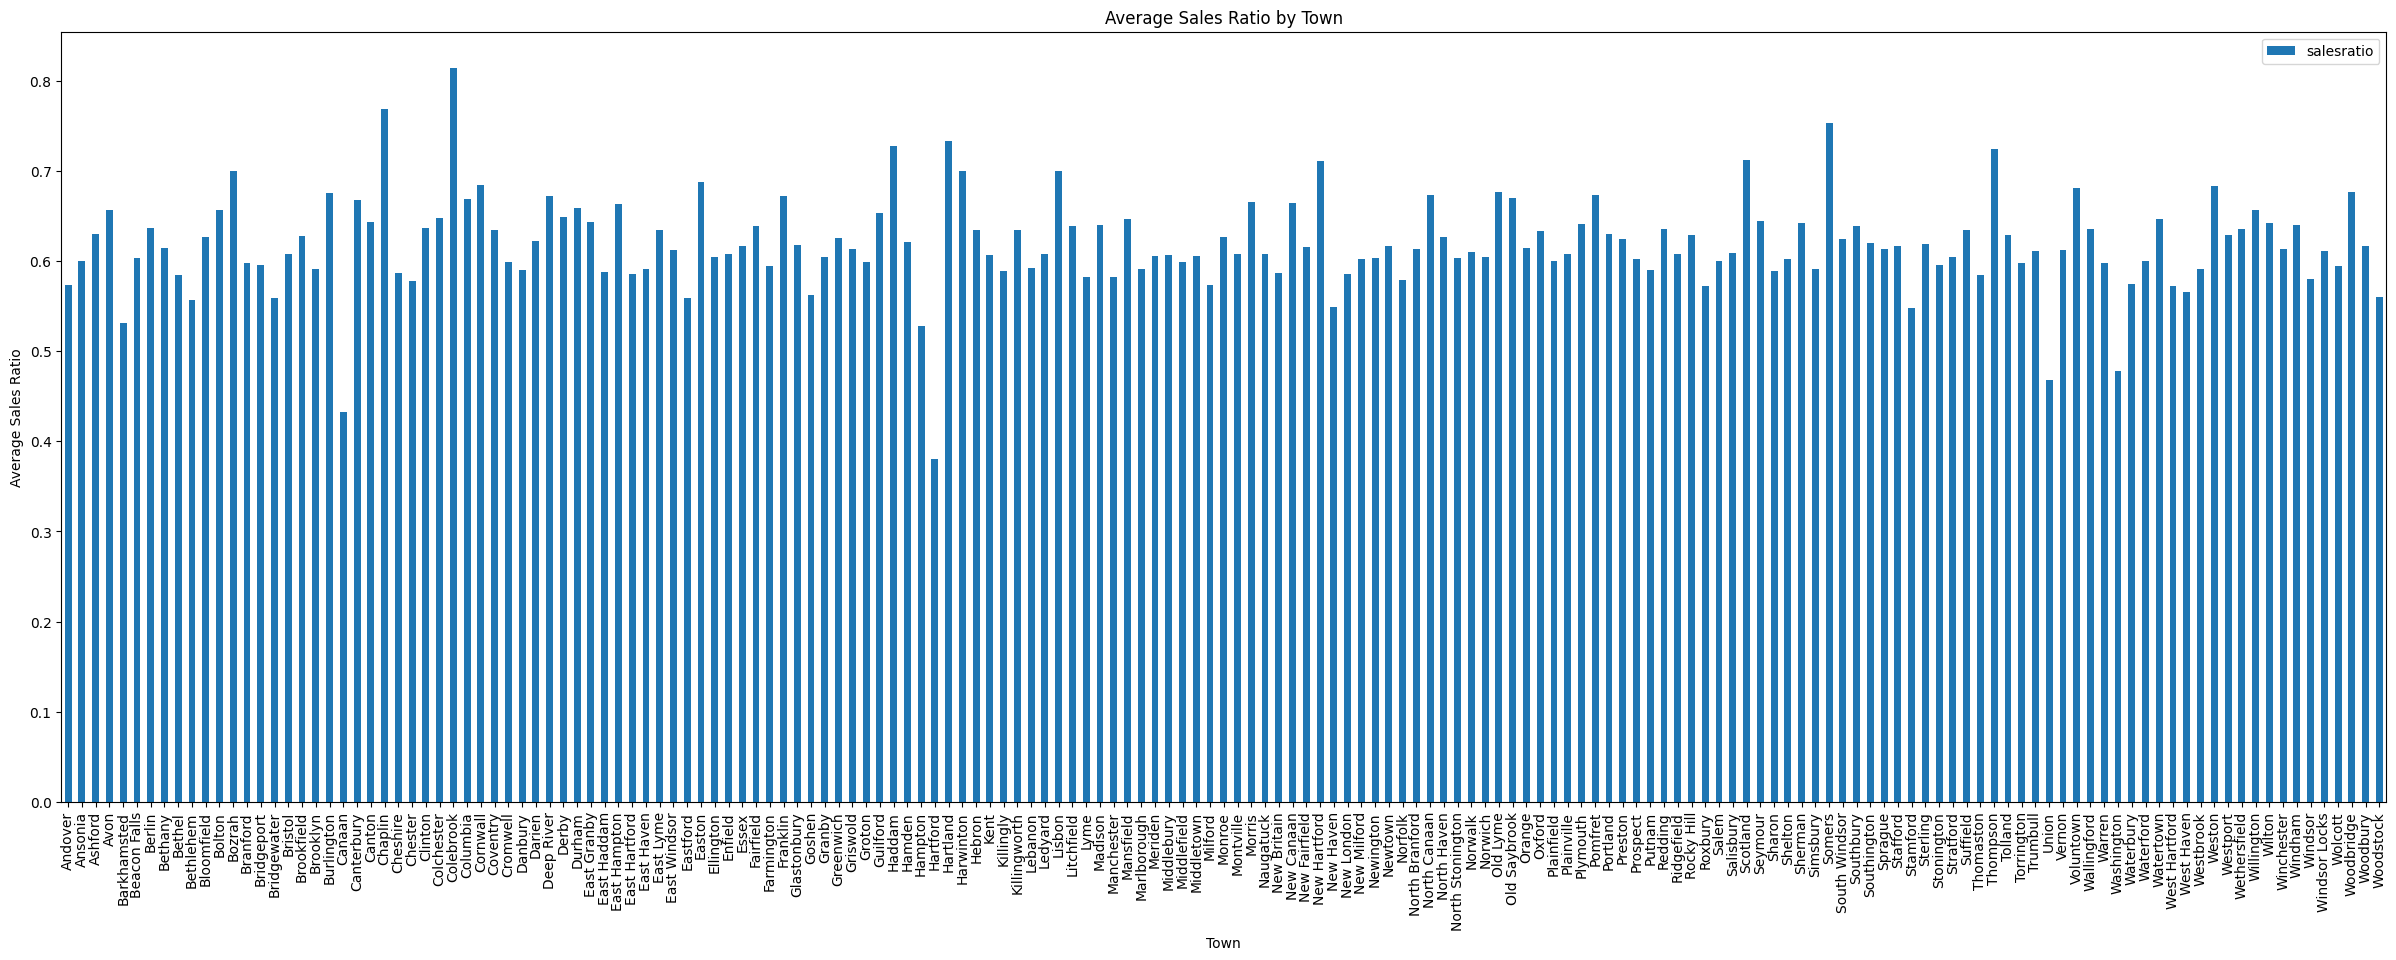

In [87]:
# make table with just town and salesratio columns
df4 = df_merge[['town', 'salesratio']]

# convert all salesratio values to floats
df4['salesratio'] = df4['salesratio'].astype(float)

# group by town and average the salesratio
df4 = df4.groupby('town').mean()

# remove the rows where town is '***Unknown***'
df4 = df4[df4.index != '***Unknown***']

df4.head()

# bar graph with town vs salesratio
df4.plot.bar(figsize=(30,10), title='Average Sales Ratio by Town')
plt.xlabel('Town')
plt.ylabel('Average Sales Ratio')
plt.show()

In [109]:
# summary of bar graph
df4.describe()

salesratio
count  169.000000
mean     0.619080
std      0.051667
min      0.380444
25%      0.595011
50%      0.613217
75%      0.640661
max      0.813927

From the graph summary, we can find that an upper outlier = Q3 + 1.5*IQR = 0.640661 + 1.5*(0.640661-0.595011) = 0.709136. We can then refer to the bar graph to find any towns that have sales ratio values that exceed the upper outlier values. To make it easier to identify these values, let's plot a horizontal line on our bar graph at y=0.709136.

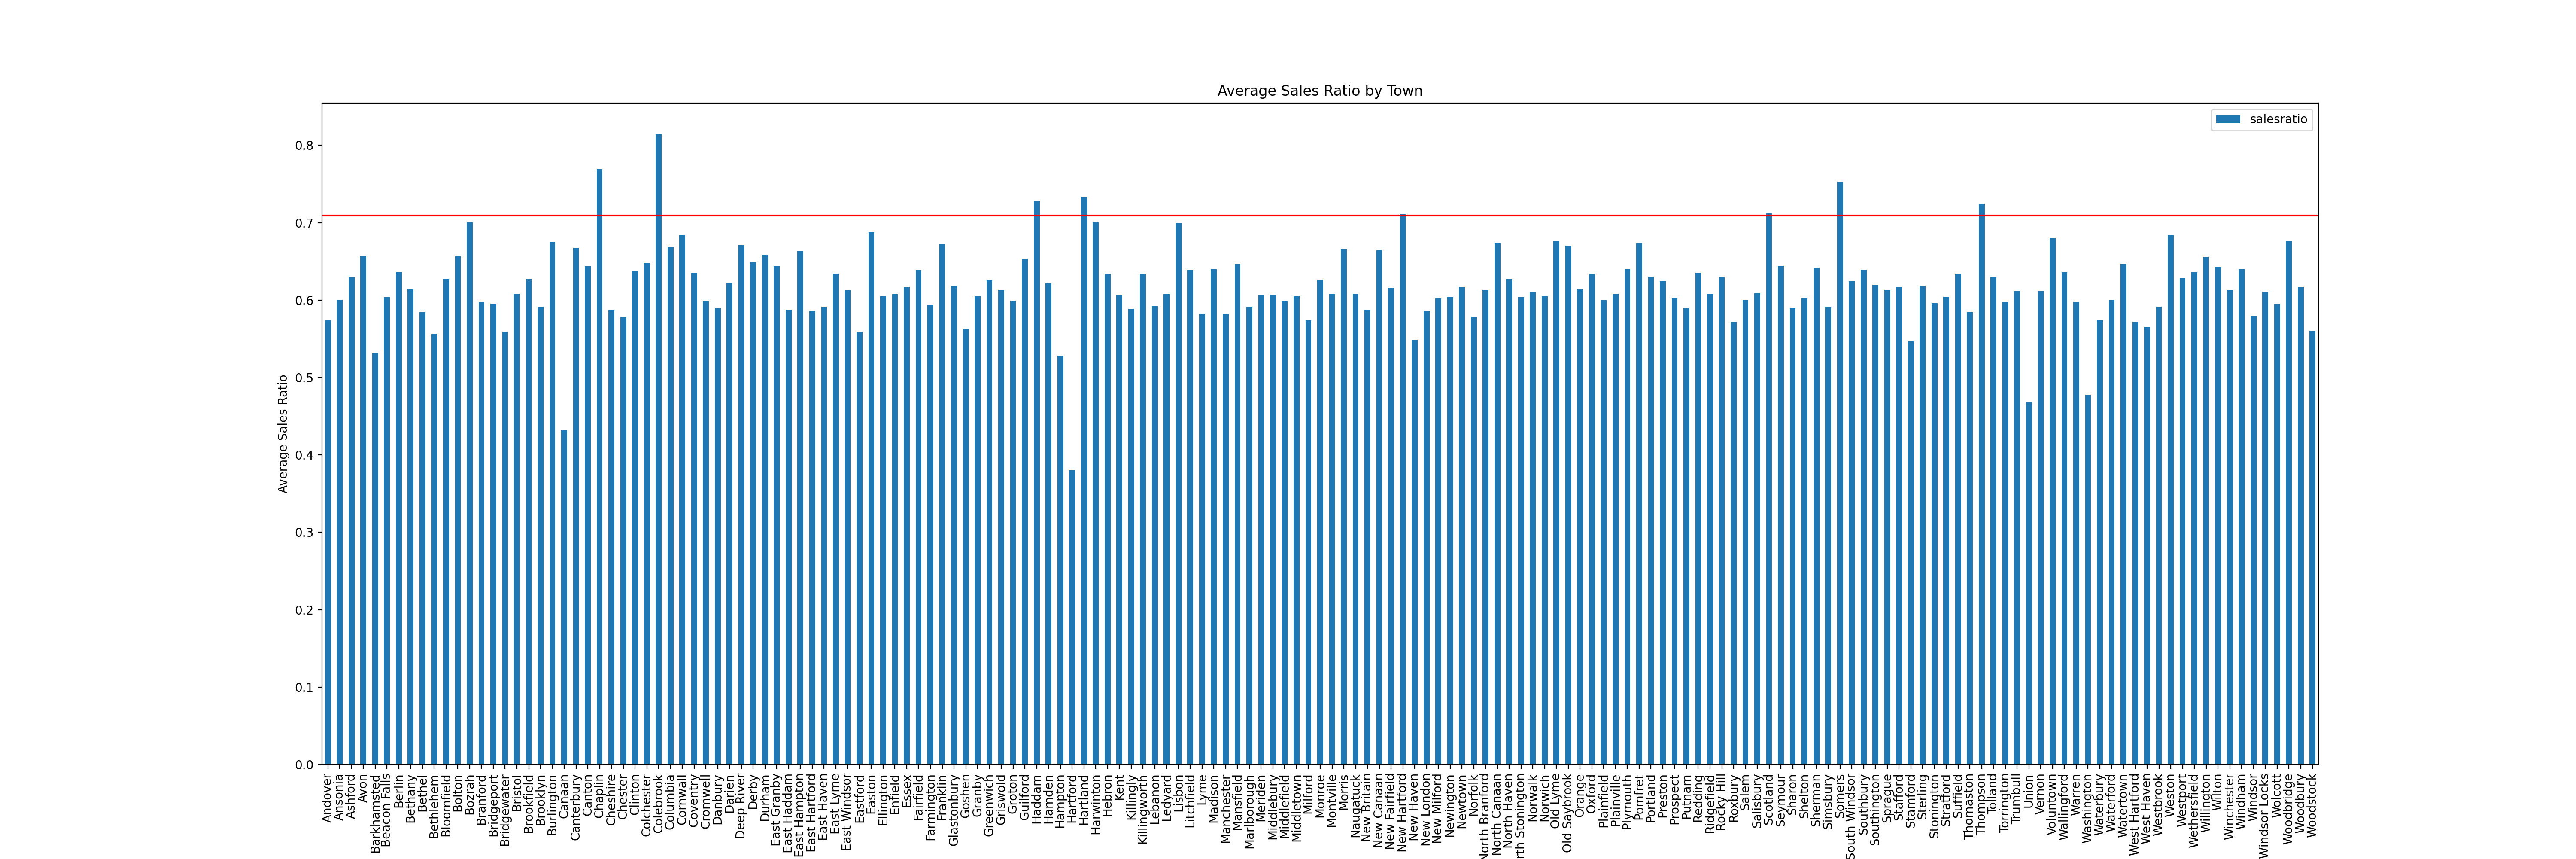

In [111]:
df4.plot.bar(figsize=(30,10), title='Average Sales Ratio by Town')
plt.xlabel('Town')
plt.ylabel('Average Sales Ratio')

# add a horizontal line y=0.709136 to plt
plt.axhline(y=0.709136, color='r', linestyle='-')

plt.show()

We can easily identify the towns that have average sales ratios that are noticeably higher than the rest: Chaplin, Colebrook, Haddam, Hartland, New Hartford, Scotland, Somers, and Thompson. Knowing this, we can include town as a factor that more likely affects sales ratios of real-estate in Connecticut (and to sales ratios in general). 

We can further explore the effect of location on sales ratio by creating a map of plotted addresses of real-estate units in Connecticut and focusing on the distribution of spread of sales ratios. We're going to make a map of each house's location, using its longitude (y_coord) and latitude (x_coord) values, and label each point/marker with its address name, on a map of Connecticut. This way, we can get a better visual of where houses are generally located in the state.

In [ ]:
import folium

# remove all rows with nan as x_coord or y_coord
df5 = df_merge.dropna(subset=['x_coord', 'y_coord'])\

# create a map centered on connecticut
m = folium.Map(location=[41.6, -72.7], zoom_start=9)

# plot all addresses on the map
for i, row in df5.iterrows():
    folium.CircleMarker(
        [row['y_coord'], row['x_coord']],
        radius=5,
        popup=row['salesratio'],
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        tooltip=row['salesratio']
    ).add_to(m)

m

Now we can see the relative locations of each address on a map of Connecticut, with their sales ratios visible when we hover over each point. But it would be more helpful 

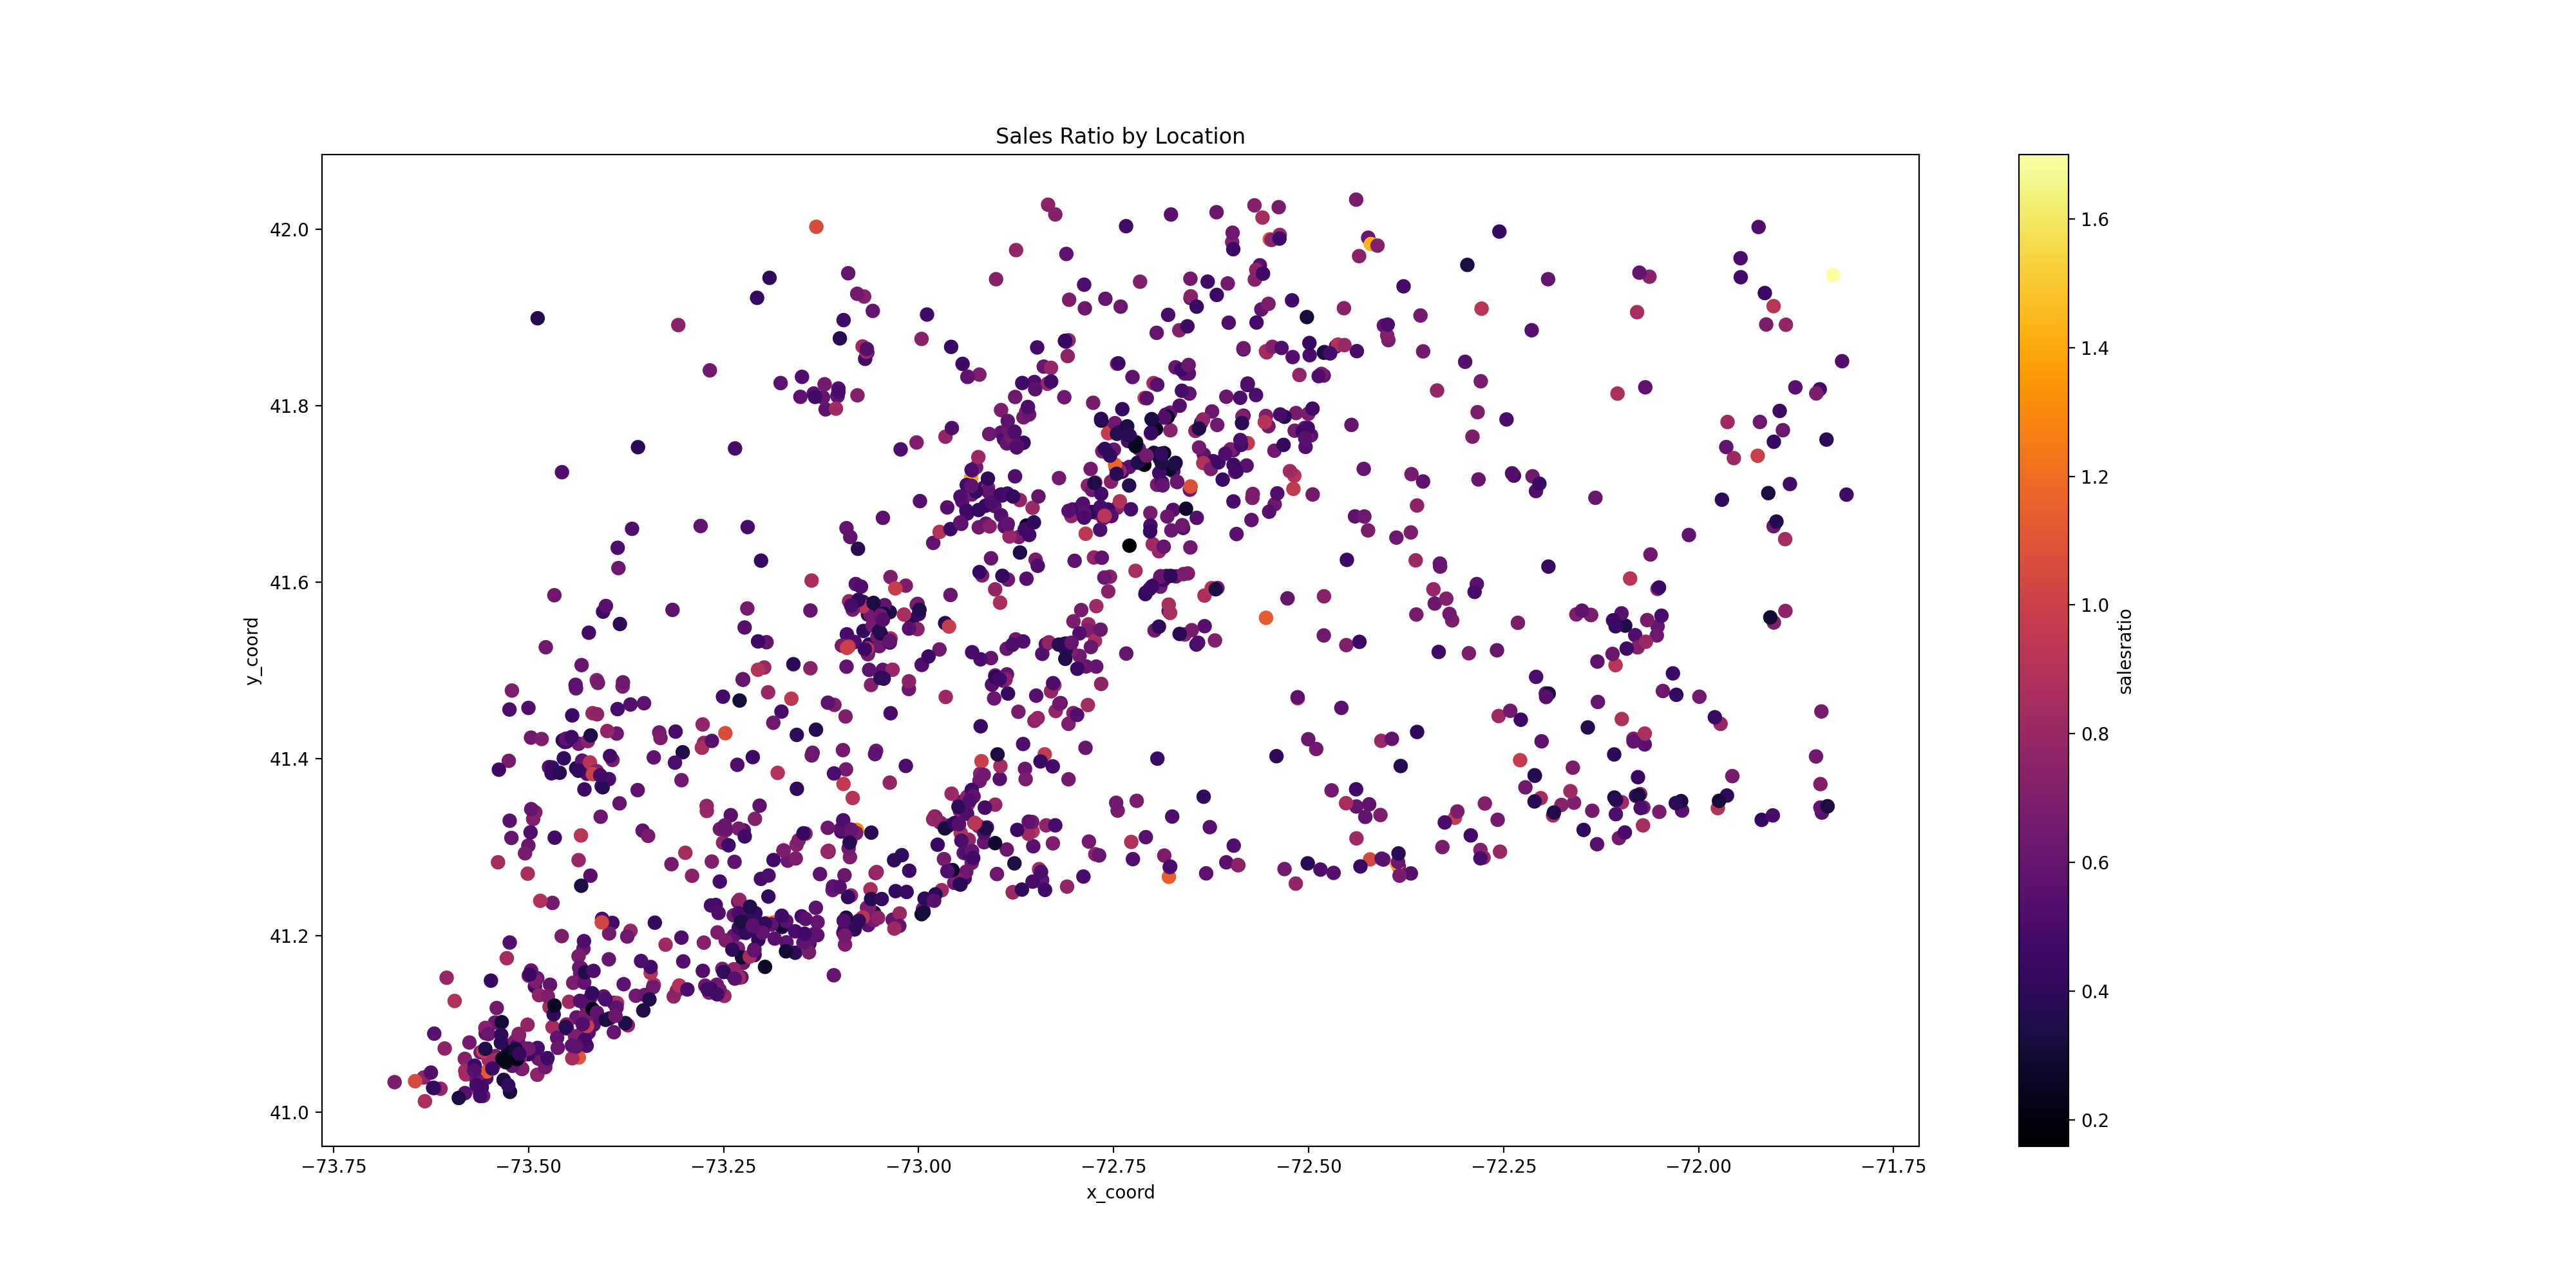

In [128]:
# create a scatter plot of x_coord vs y_coord, where the color of the points is determined by the salesratio
df_merge.plot.scatter(x='x_coord', y='y_coord', c='salesratio', colormap='inferno', figsize=(20,10), title='Sales Ratio by Location', s=50)
plt.xlabel('x_coord')
plt.ylabel('y_coord')
plt.show()

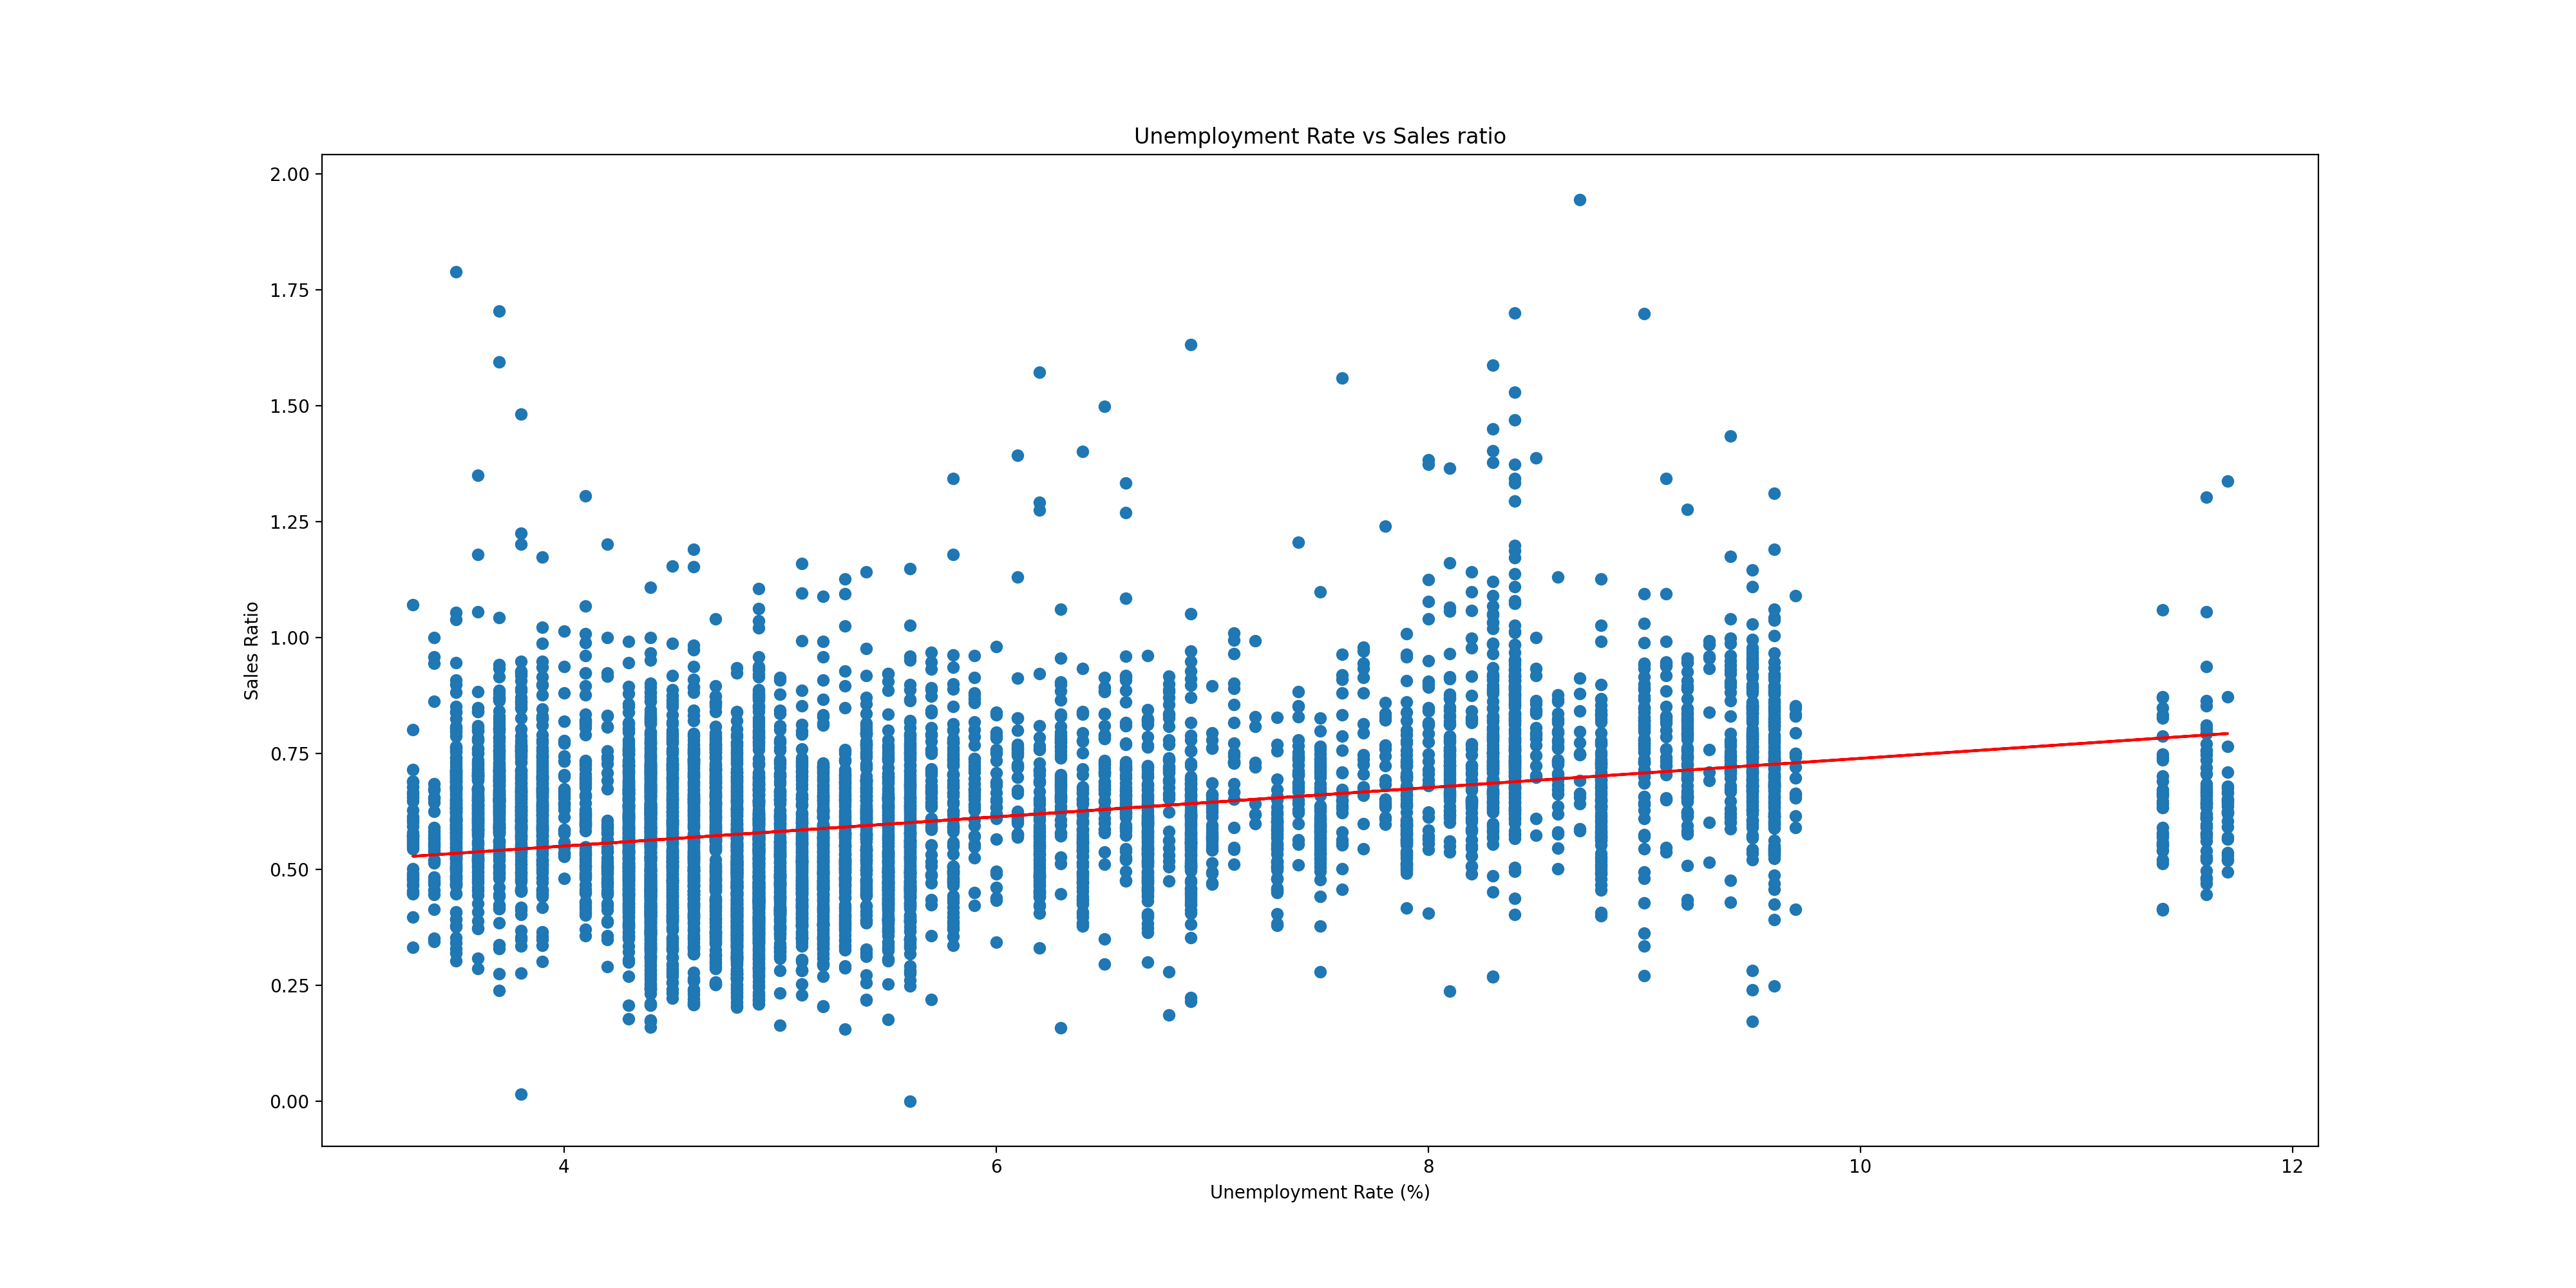

In [132]:
# unemployment rate
plt.figure(figsize=(20, 10))
plt.title("Unemployment Rate vs Sales ratio")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Sales Ratio")
# plt.ylim(0, 2.5)

plt.scatter(df_merge['UnemploymentRate'], df_merge['salesratio'])
z = np.polyfit(df_merge['UnemploymentRate'], df_merge['salesratio'], 1)
p = np.poly1d(z)
plt.plot(df_merge['UnemploymentRate'],p(df_merge['UnemploymentRate']),"r")
plt.show()

In [90]:
from plotnine import *

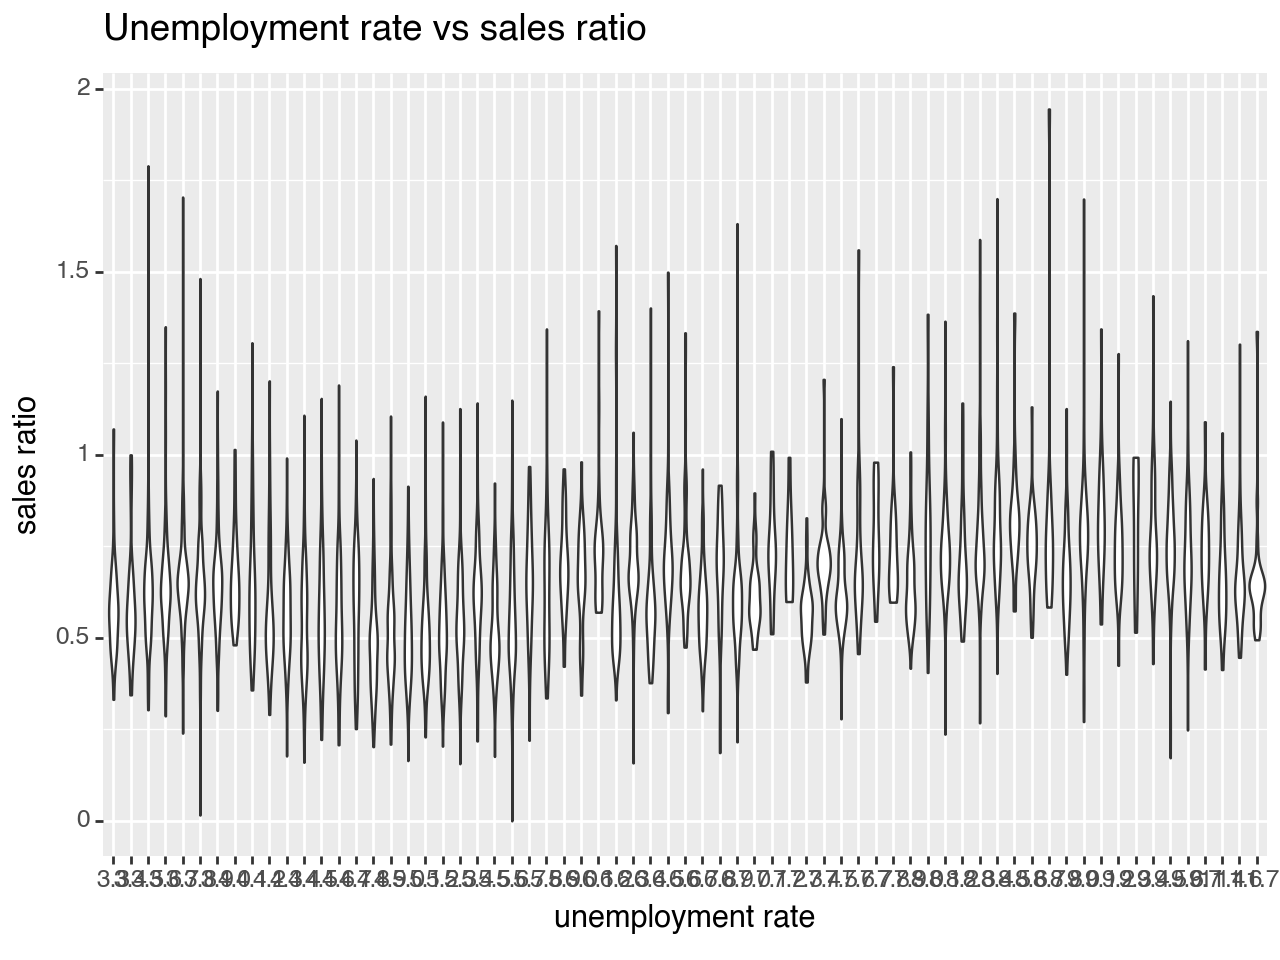

<Figure Size: (640 x 480)>

In [91]:
df = df_merge.copy()
df['UnemploymentRate'] = df['UnemploymentRate'].astype(object)
ggplot(data=df, mapping=aes(x='UnemploymentRate', y='salesratio')) +\
geom_violin() +\
labs(title="Unemployment rate vs sales ratio",
     x = "unemployment rate",
     y = "sales ratio") 

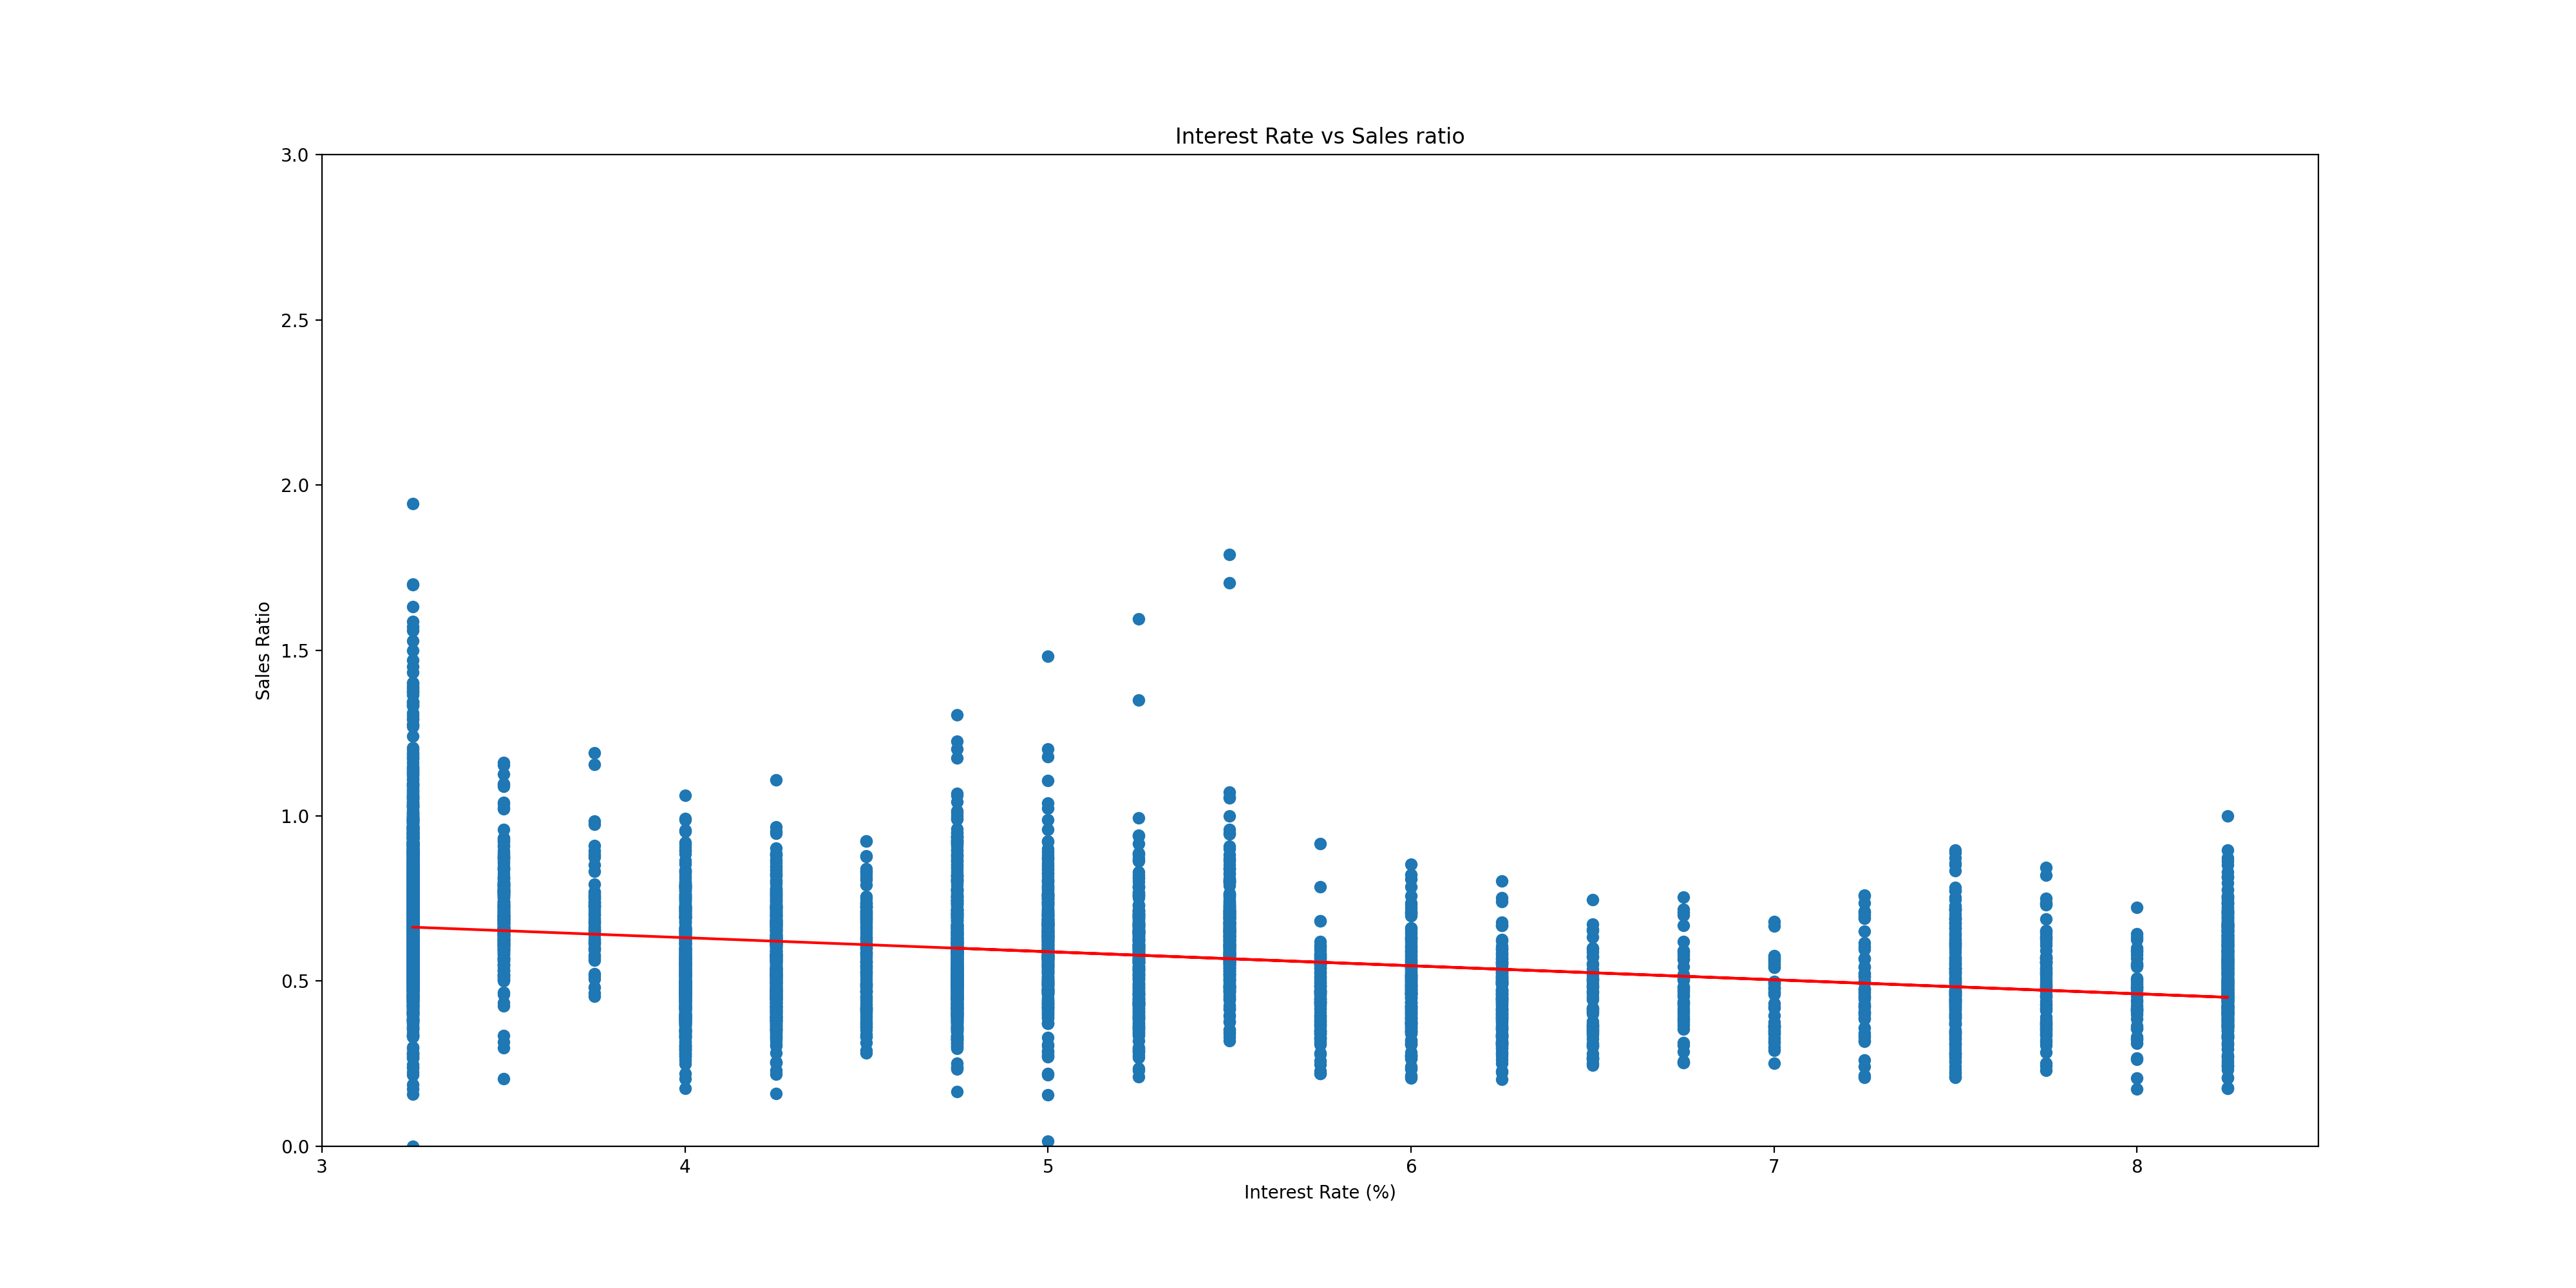

In [131]:
# unemployment rate
plt.figure(figsize=(20, 10))
plt.title("Interest Rate vs Sales ratio")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Sales Ratio")
plt.ylim(0, 3)

plt.scatter(df_merge['primeRate'], df_merge['salesratio'])

z = np.polyfit(df_merge['primeRate'], df_merge['salesratio'], 1)
p = np.poly1d(z)
plt.plot(df_merge['primeRate'],p(df_merge['primeRate']),"r")
plt.show()

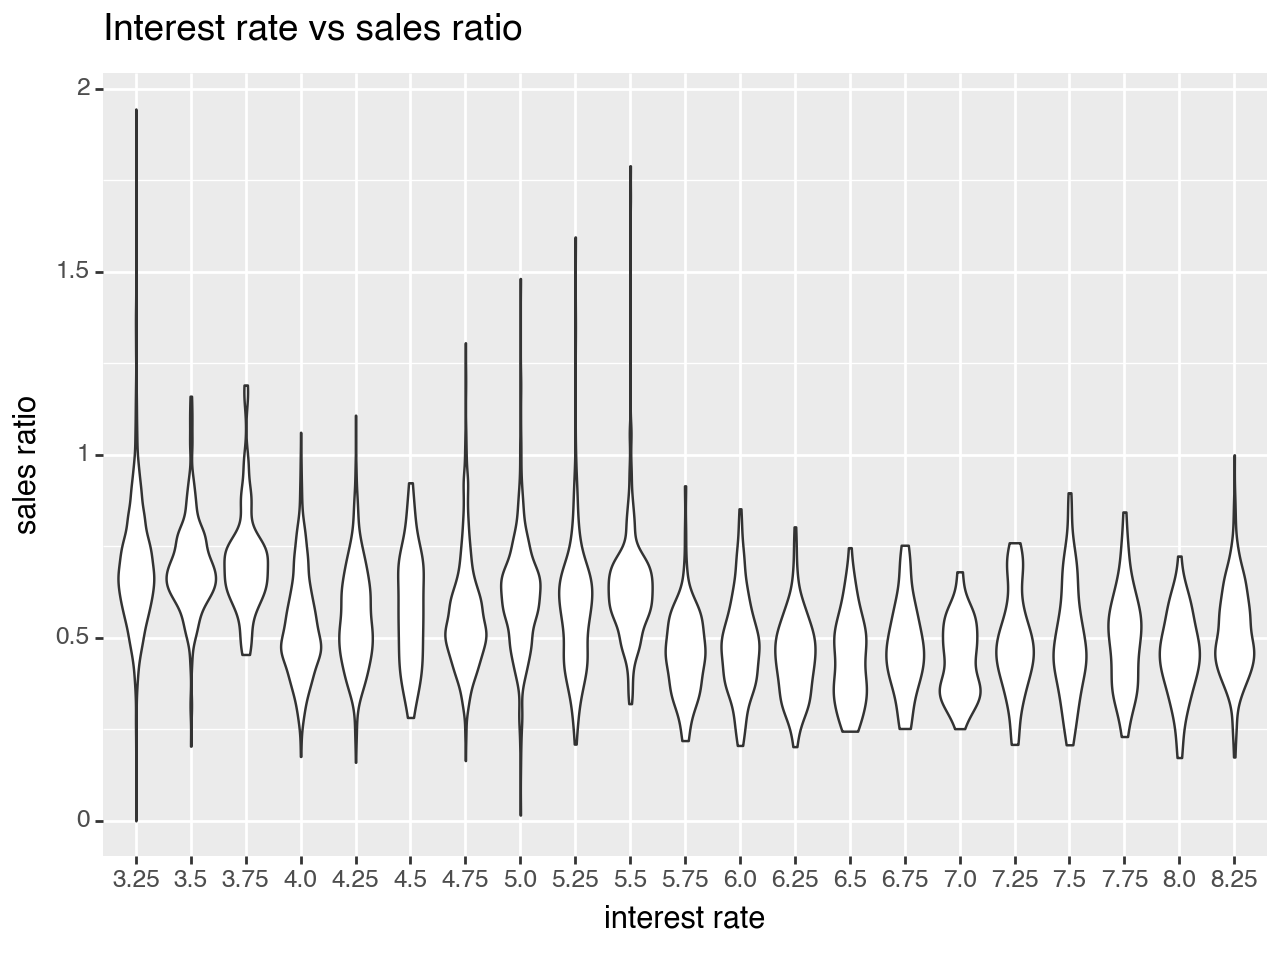

<Figure Size: (640 x 480)>

In [93]:
df = df_merge.copy()
df['primeRate'] = df['primeRate'].astype(object)
ggplot(data=df, mapping=aes(x='primeRate', y='salesratio')) +\
geom_violin() +\
labs(title="Interest rate vs sales ratio",
     x = "interest rate",
     y = "sales ratio") 

Now we'll make a line graph of sales ratio over time for all towns. What do you expect to see in this line graph? Will there be a general trend of increasing or decreasing sales ratio over time? Let's code it up and take a look!

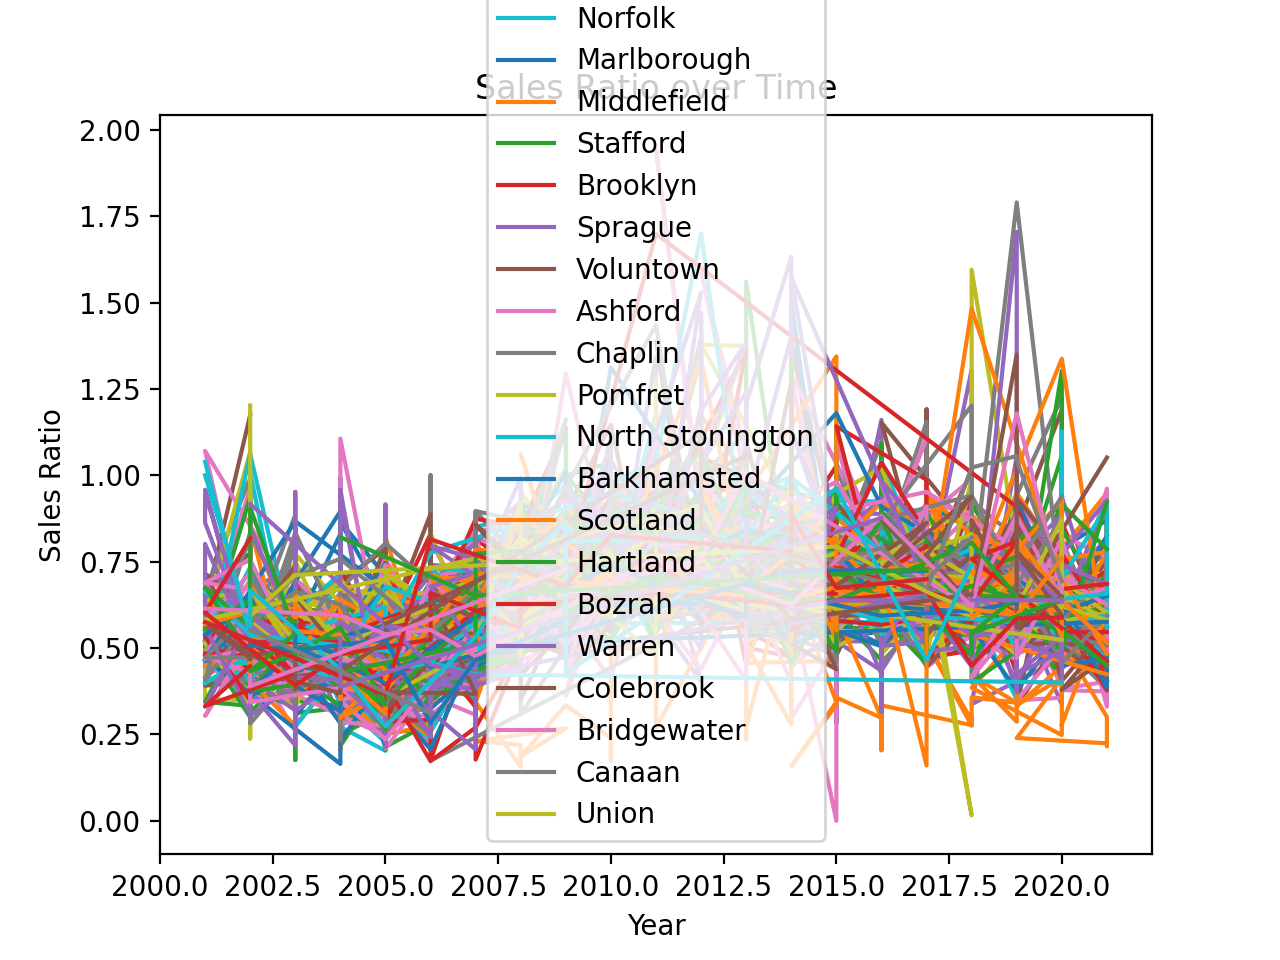

In [94]:
# plot each town's salesratio vs time onto a line graph
for town in df_merge['town'].unique():
    df_town = df_merge[df_merge['town'] == town]
    plt.plot(df_town['Year'], df_town['salesratio'], label=town)

plt.xlabel('Year')
plt.ylabel('Sales Ratio')
plt.title("Sales Ratio over Time")
plt.legend()
plt.show()

From the above line graph, we can see each town's sales ratio vs time. We can see that each town's sales ratios tend to hover between 0.3 and 1.3 throughout 2001-2020. Also, the sales ratios for each town are more similar in value towards 2001, and vary more towards 2020. Was there a general trend? Perhaps there was a slightly positive trend, where the average sales ratio across all towns increased. Other than that, we can see that each line representing a town tends to fluctuate up and down more suddenly, rather than increasing/decreasing slowly. This finding supports that there are other factors at play in shaping the sales ratio in each town besides time.

## Step 4: Model: Analysis, Hypothesis Testing, Machine Learning

## Step 5: Interpretation: Insight & Policy Decision

## Appendices

0            Condo
1      Four Family
2    Single Family
3     Three Family
4       Two Family
Name: residentialtype, dtype: object


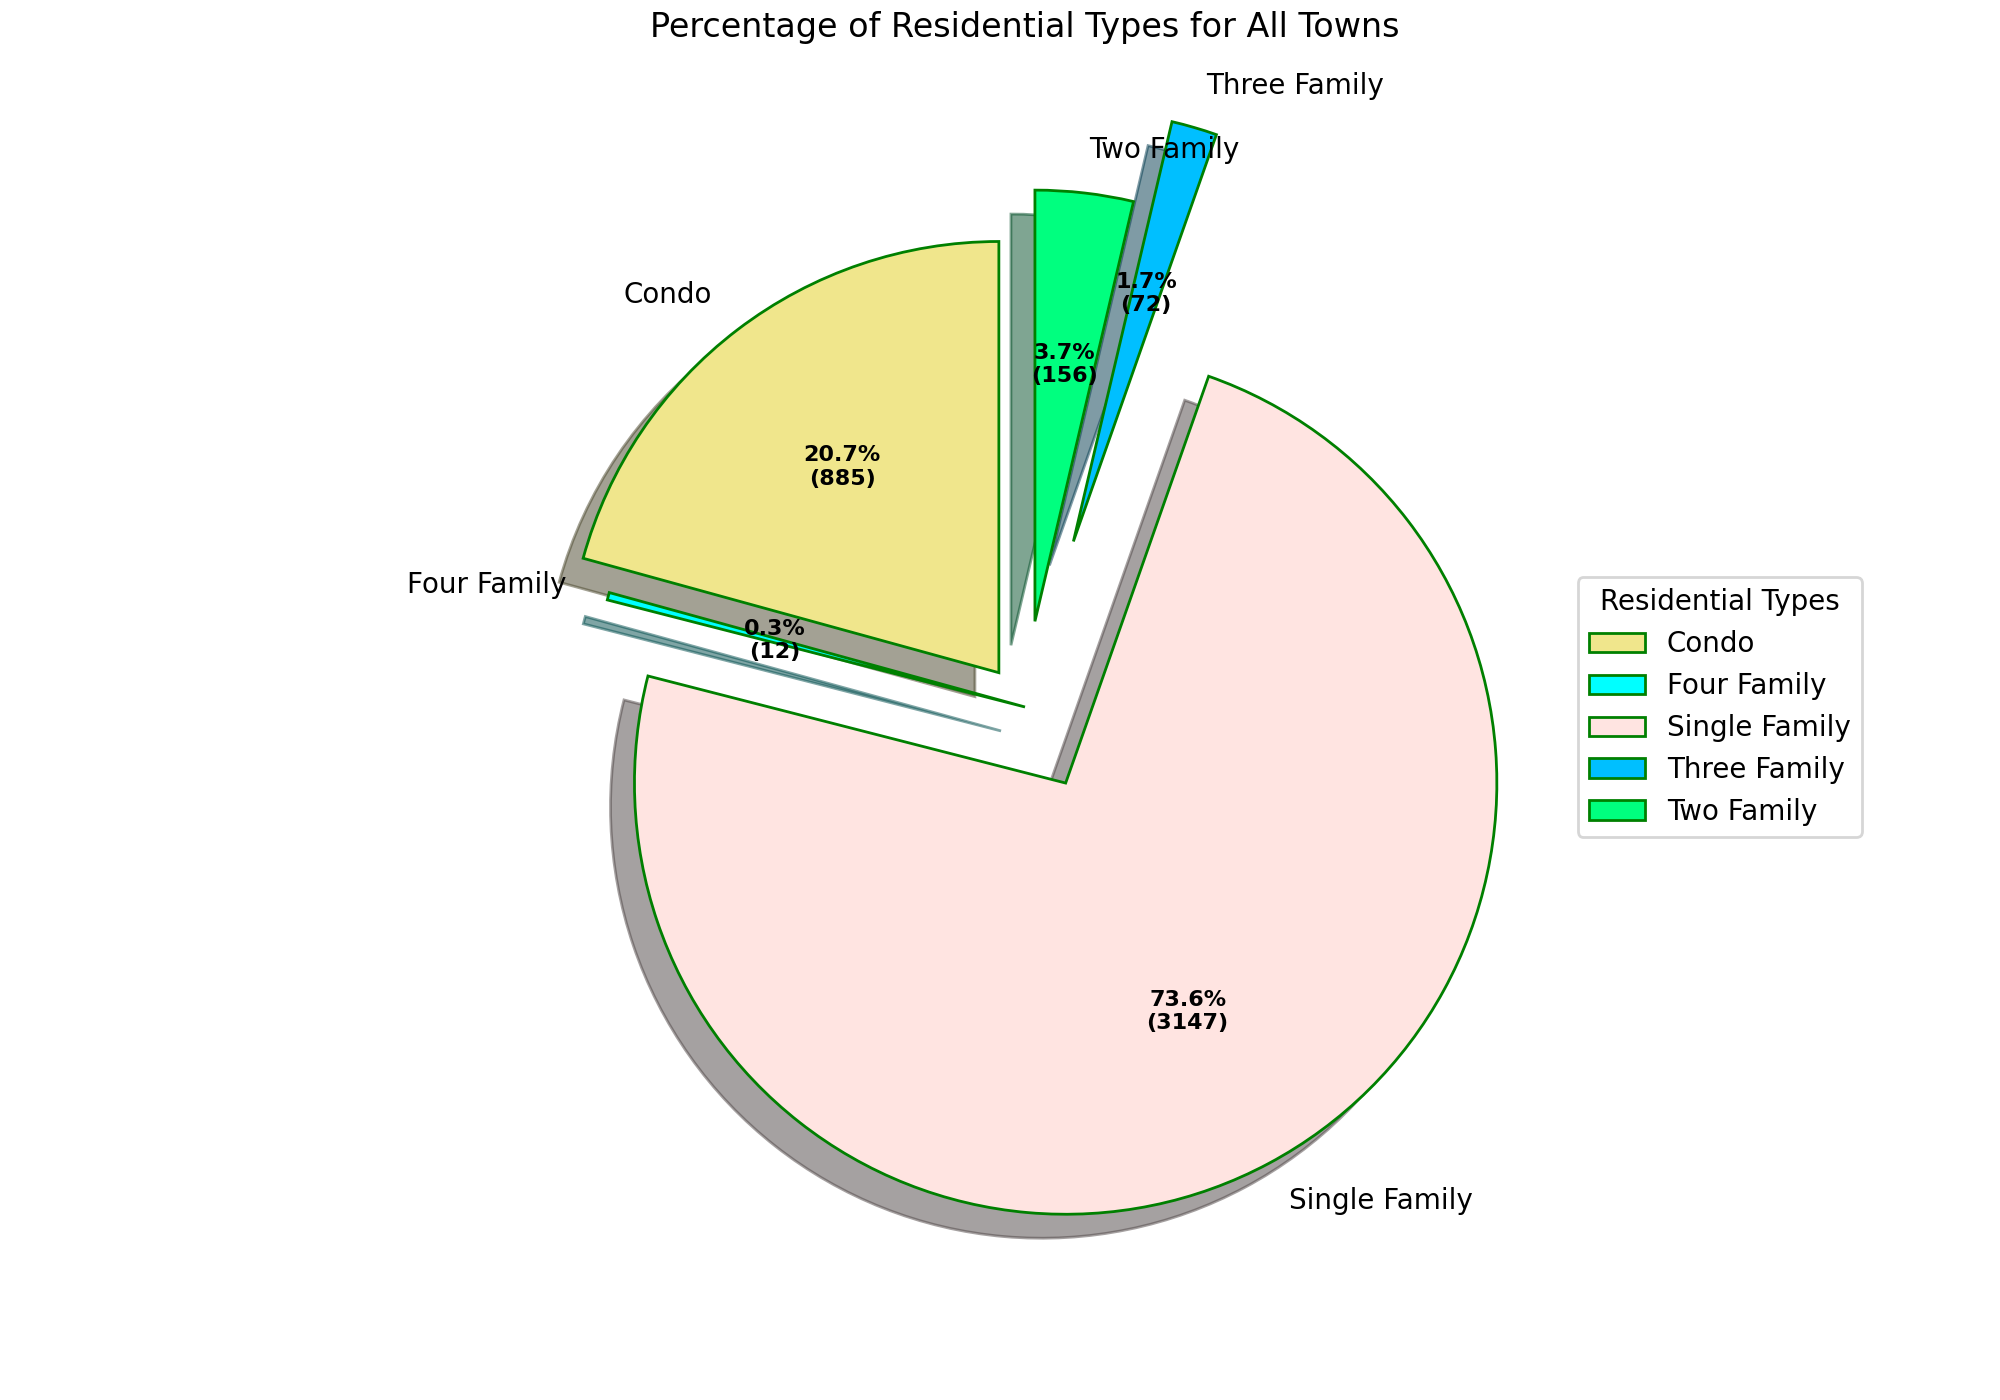

In [ ]:
res_type_df= results_df.groupby('residentialtype').first()
res_type_df['COUNT'] = results_df['residentialtype'].value_counts()
res_type_df.reset_index(inplace=True)
res_type_df= res_type_df[['residentialtype','COUNT']]
print(res_type_df['residentialtype'])
"""
data = res_type_df['COUNT'].values.tolist()
types = res_type_df['residentialtype'].values.tolist()
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = types)
 
# show plot
plt.show()"""
explode = (0.1, 0.0, 0.2, 0.4, 0.2)
 
# Creating color parameters
colors = ( "khaki", "cyan", "mistyrose",
          "deepskyblue", "springgreen")
data = res_type_df['COUNT'].values.tolist()
types = res_type_df['residentialtype'].values.tolist()

wp = { 'linewidth' : 1, 'edgecolor' : "green" }

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = types,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, types,
          title ="Residential Types",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Percentage of Residential Types for All Towns\n\n\n")
 
# show plot
plt.show()

We can also observe that the least popular type of home sale was the Four Family, accounting for only 0.3% of the total sales, and the most popular type of home sale was the Single Family, accounting for 73.6% of total sales.

We will first create a bar graph of for each of the resident types showing which town purchased the most real estate and showing the most popular residence type. 

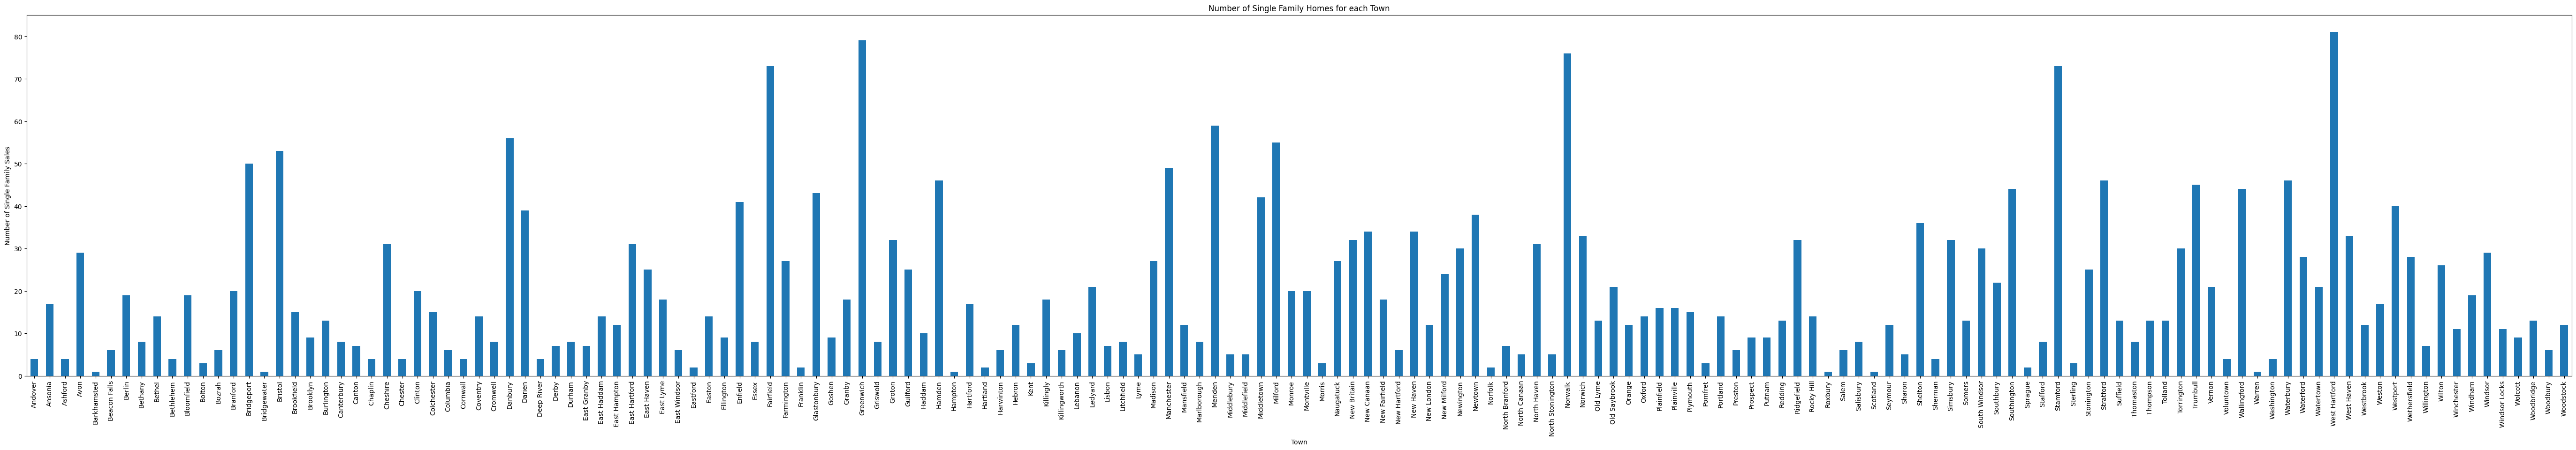

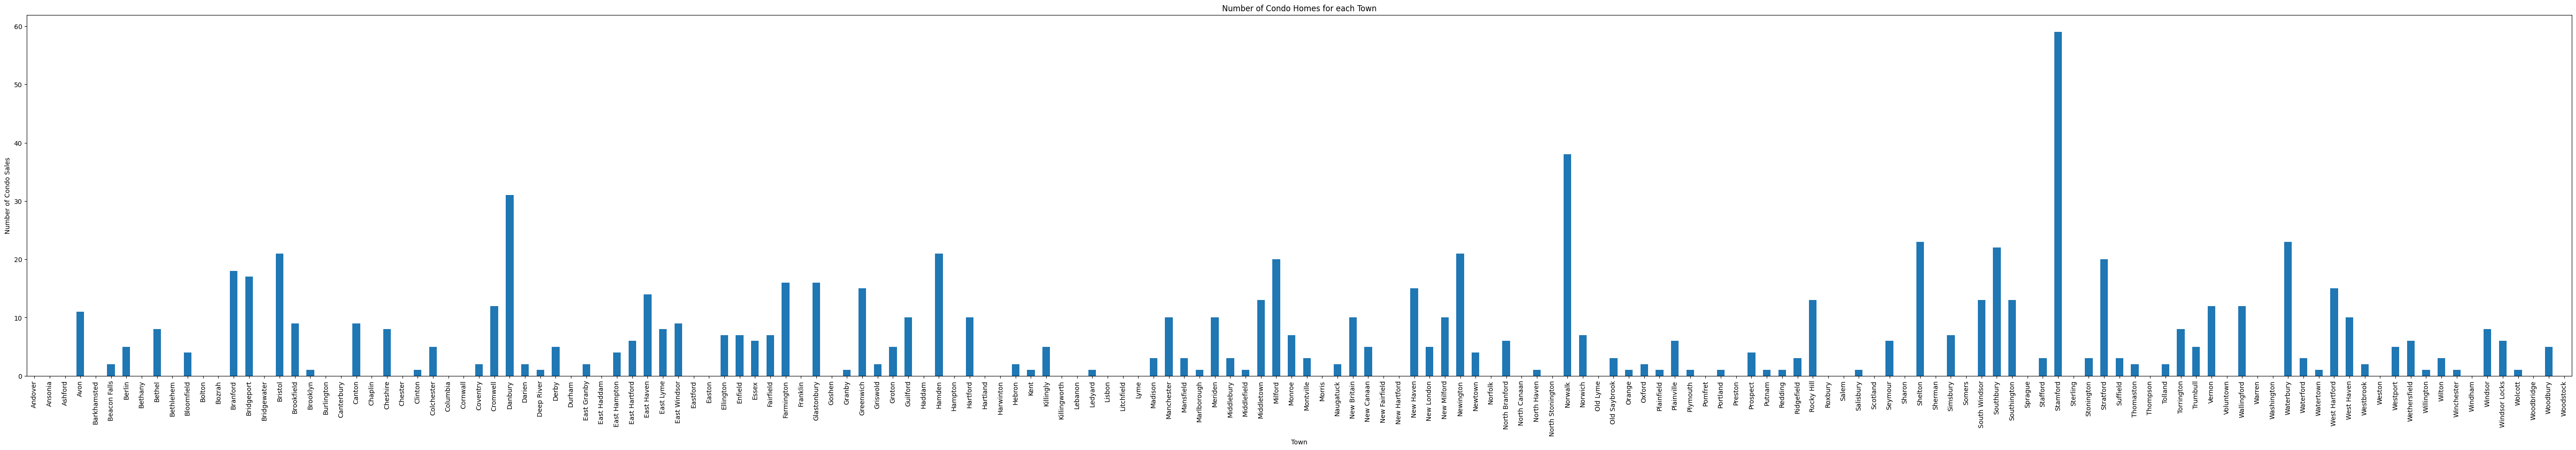

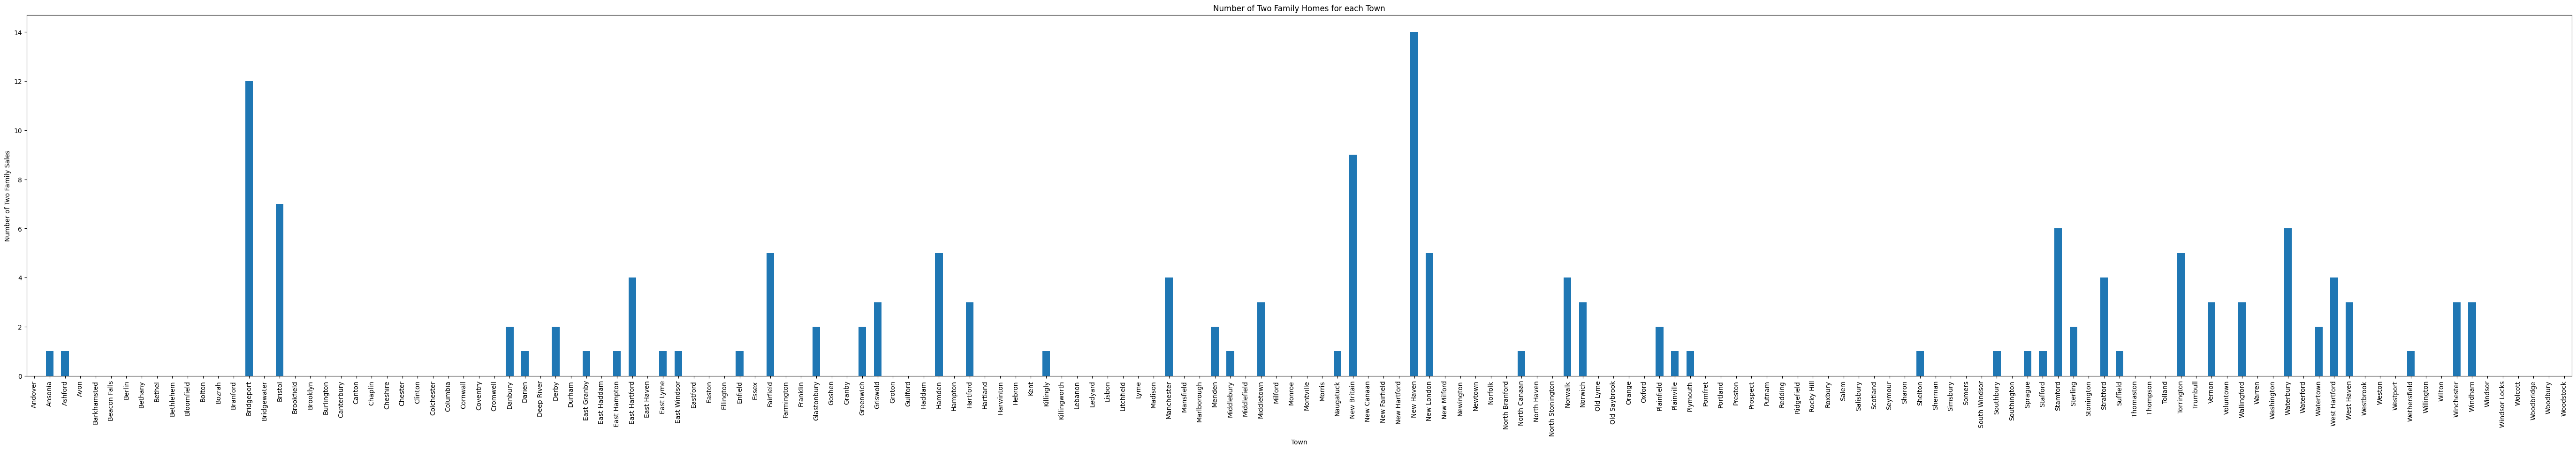

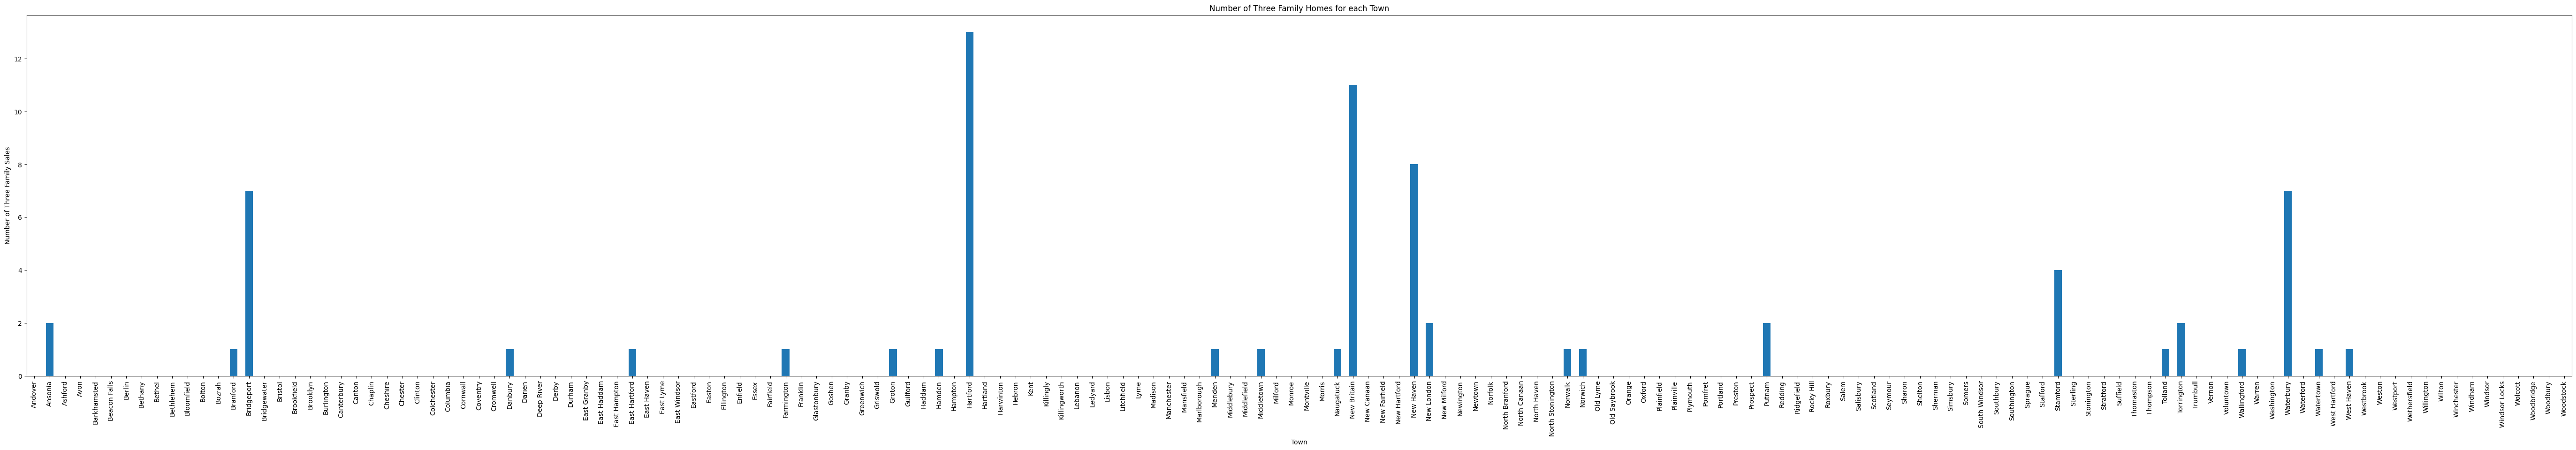

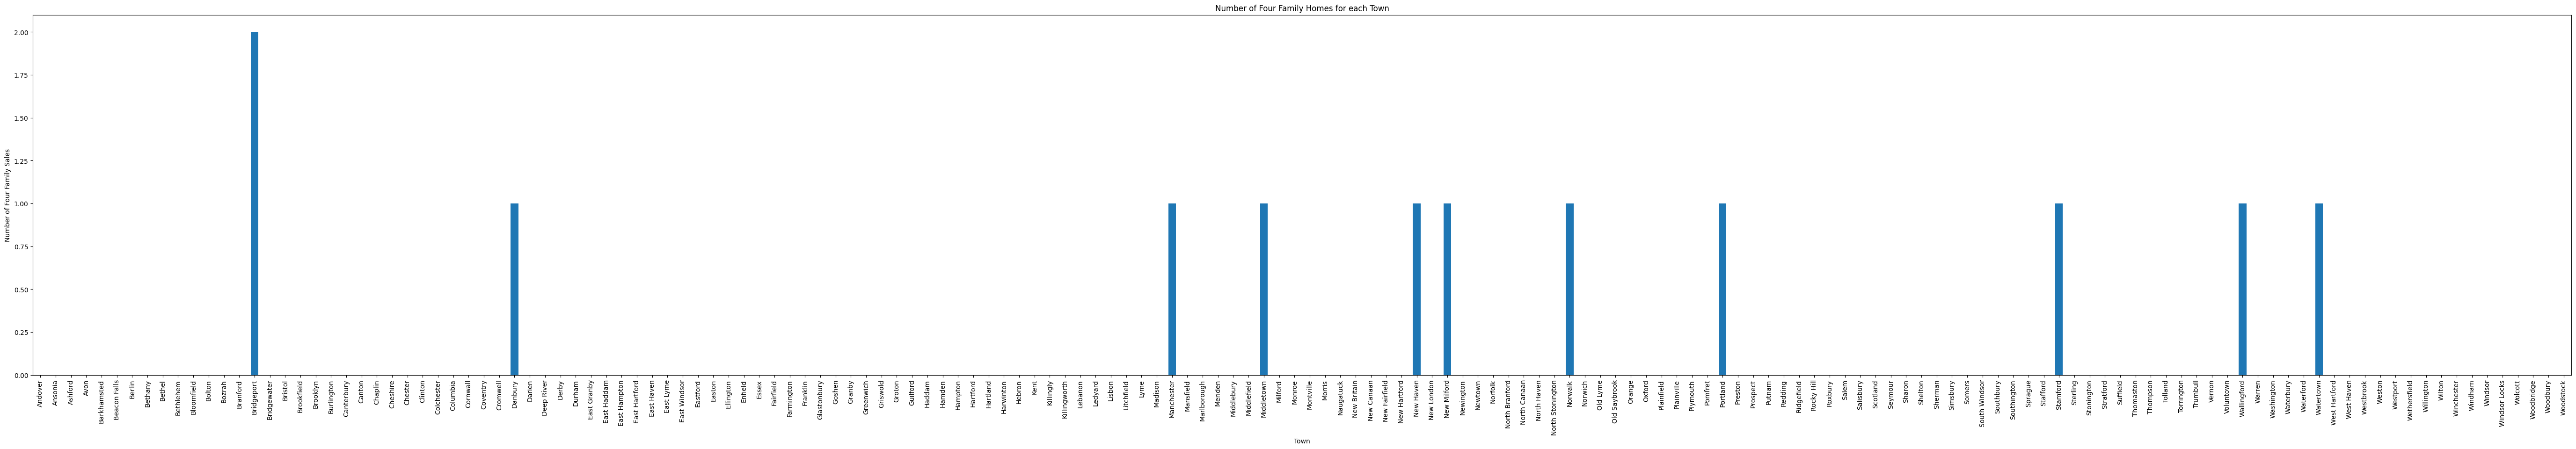

In [ ]:
for type in cleanedList:
    temp_df = residential_df[type]
    # Turn on the grid
    temp_df.plot.bar(figsize=(70,10), title='Number of ' + type + ' Homes for each Town')
    plt.xlabel('Town')
    plt.ylabel('Number of ' + type + ' Sales')
    plt.show()

We can observe from each of these graphs the towns with the highest amount of Single Family, Two Family, Condo, Four Family, and  Three Family are Waterbury, Bridgeport, Stamford, Killingly, and Waterbury respectively.

Next, we graphed each unique town with its average assessed value of houses, to get an overall assessment of the average value of homes as seen from their assessed amount in each town.

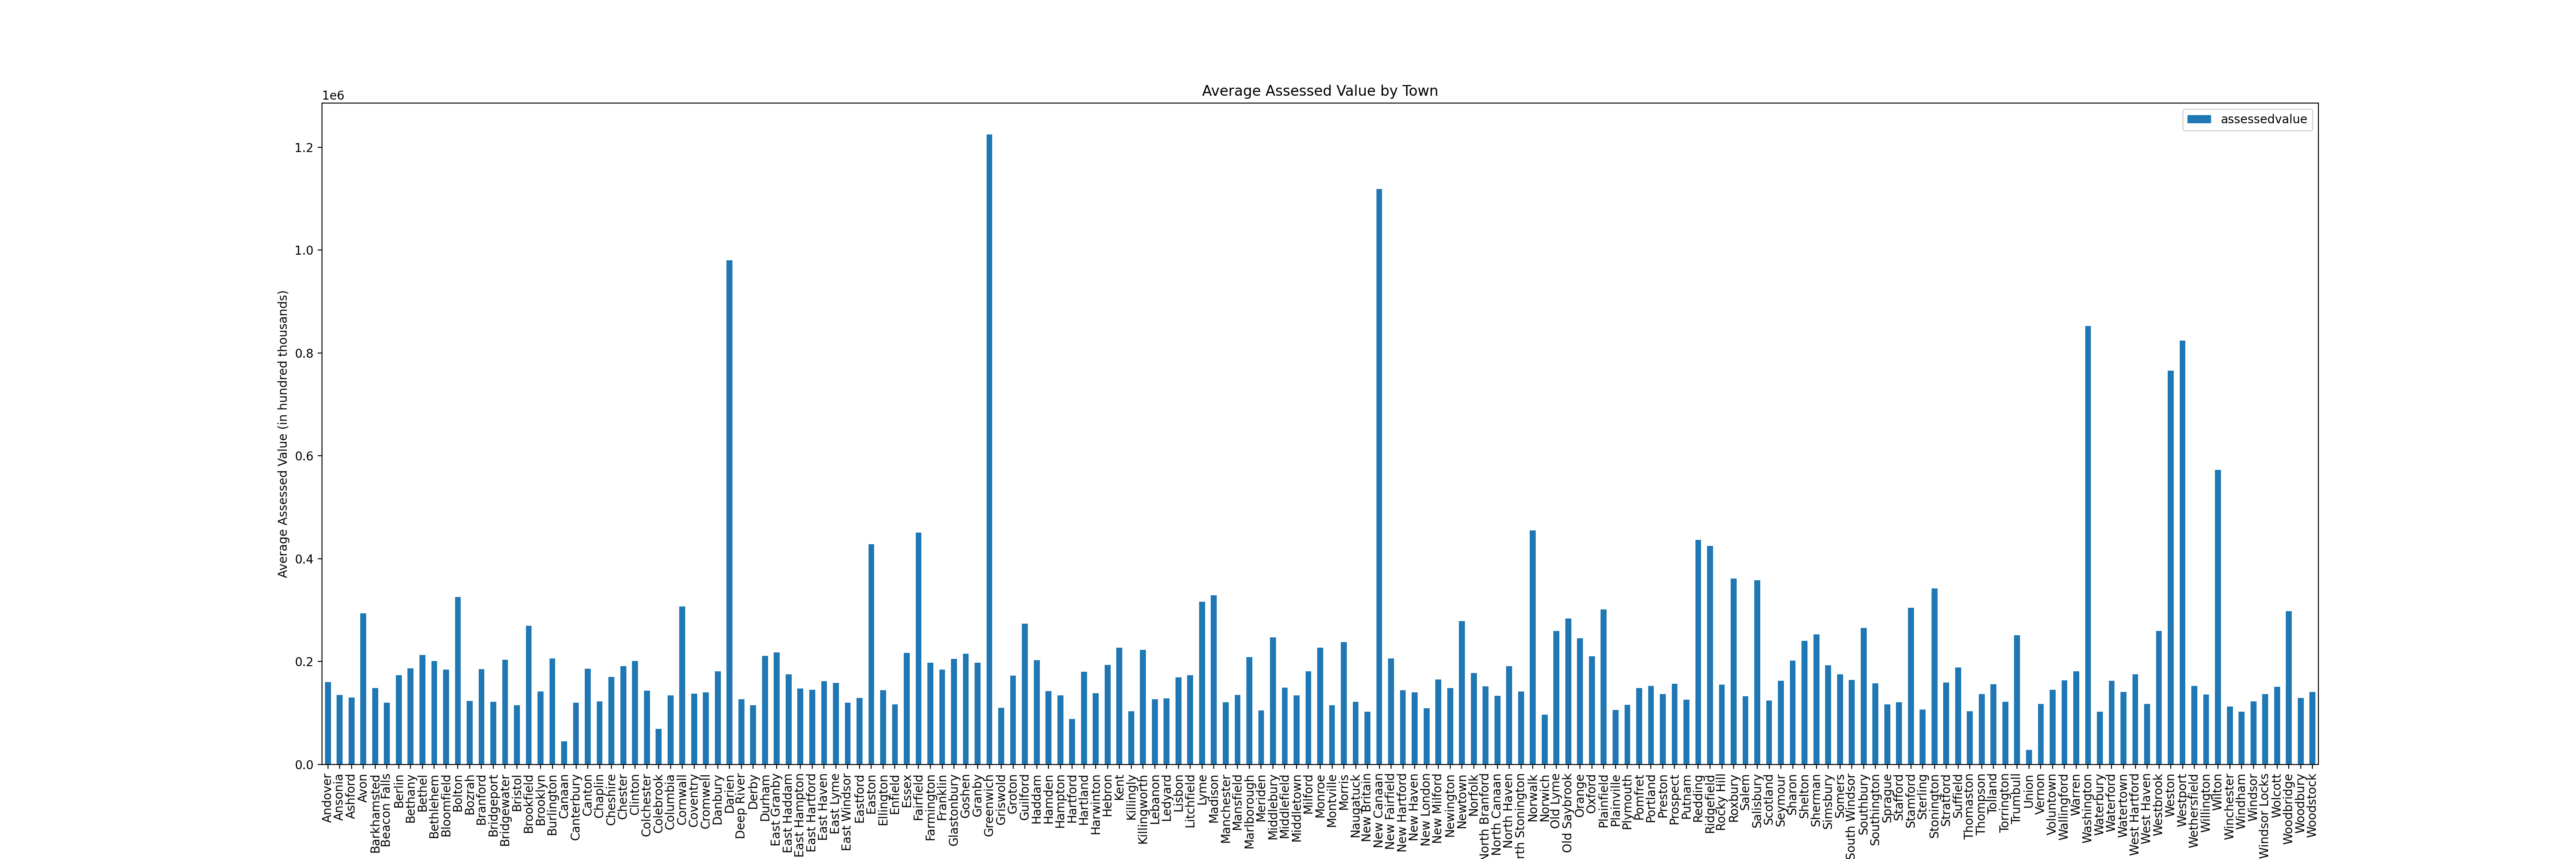

In [107]:
# make table with just town and assessedvalue columns
df2 = df_merge[['town', 'assessedvalue']]

# group by town and average the assessedvalue
df2 = df2.groupby('town').mean()

# remove the rows where town is '***Unknown***'
df2 = df2[df2.index != '***Unknown***']

df2.head()

# bar graph with town vs assessedvalue
df2.plot.bar(figsize=(30,10), title='Average Assessed Value by Town')
plt.xlabel('Town')
plt.ylabel('Average Assessed Value (in hundred thousands)')
plt.show()

As we can see from the bar graph above, the average assessed value for homes in most towns is within the ranges of $150,000 and $300,000. From this graph, we can also observe that there are towns with a signficantly higher average assessed value of homes, such as Darien, Greenwich, New Canaan, etc.

Next, we graphed each unique town with its average sale amount of houses, to get an overall assessment of the average value of homes as seen from their sale amount in each town.

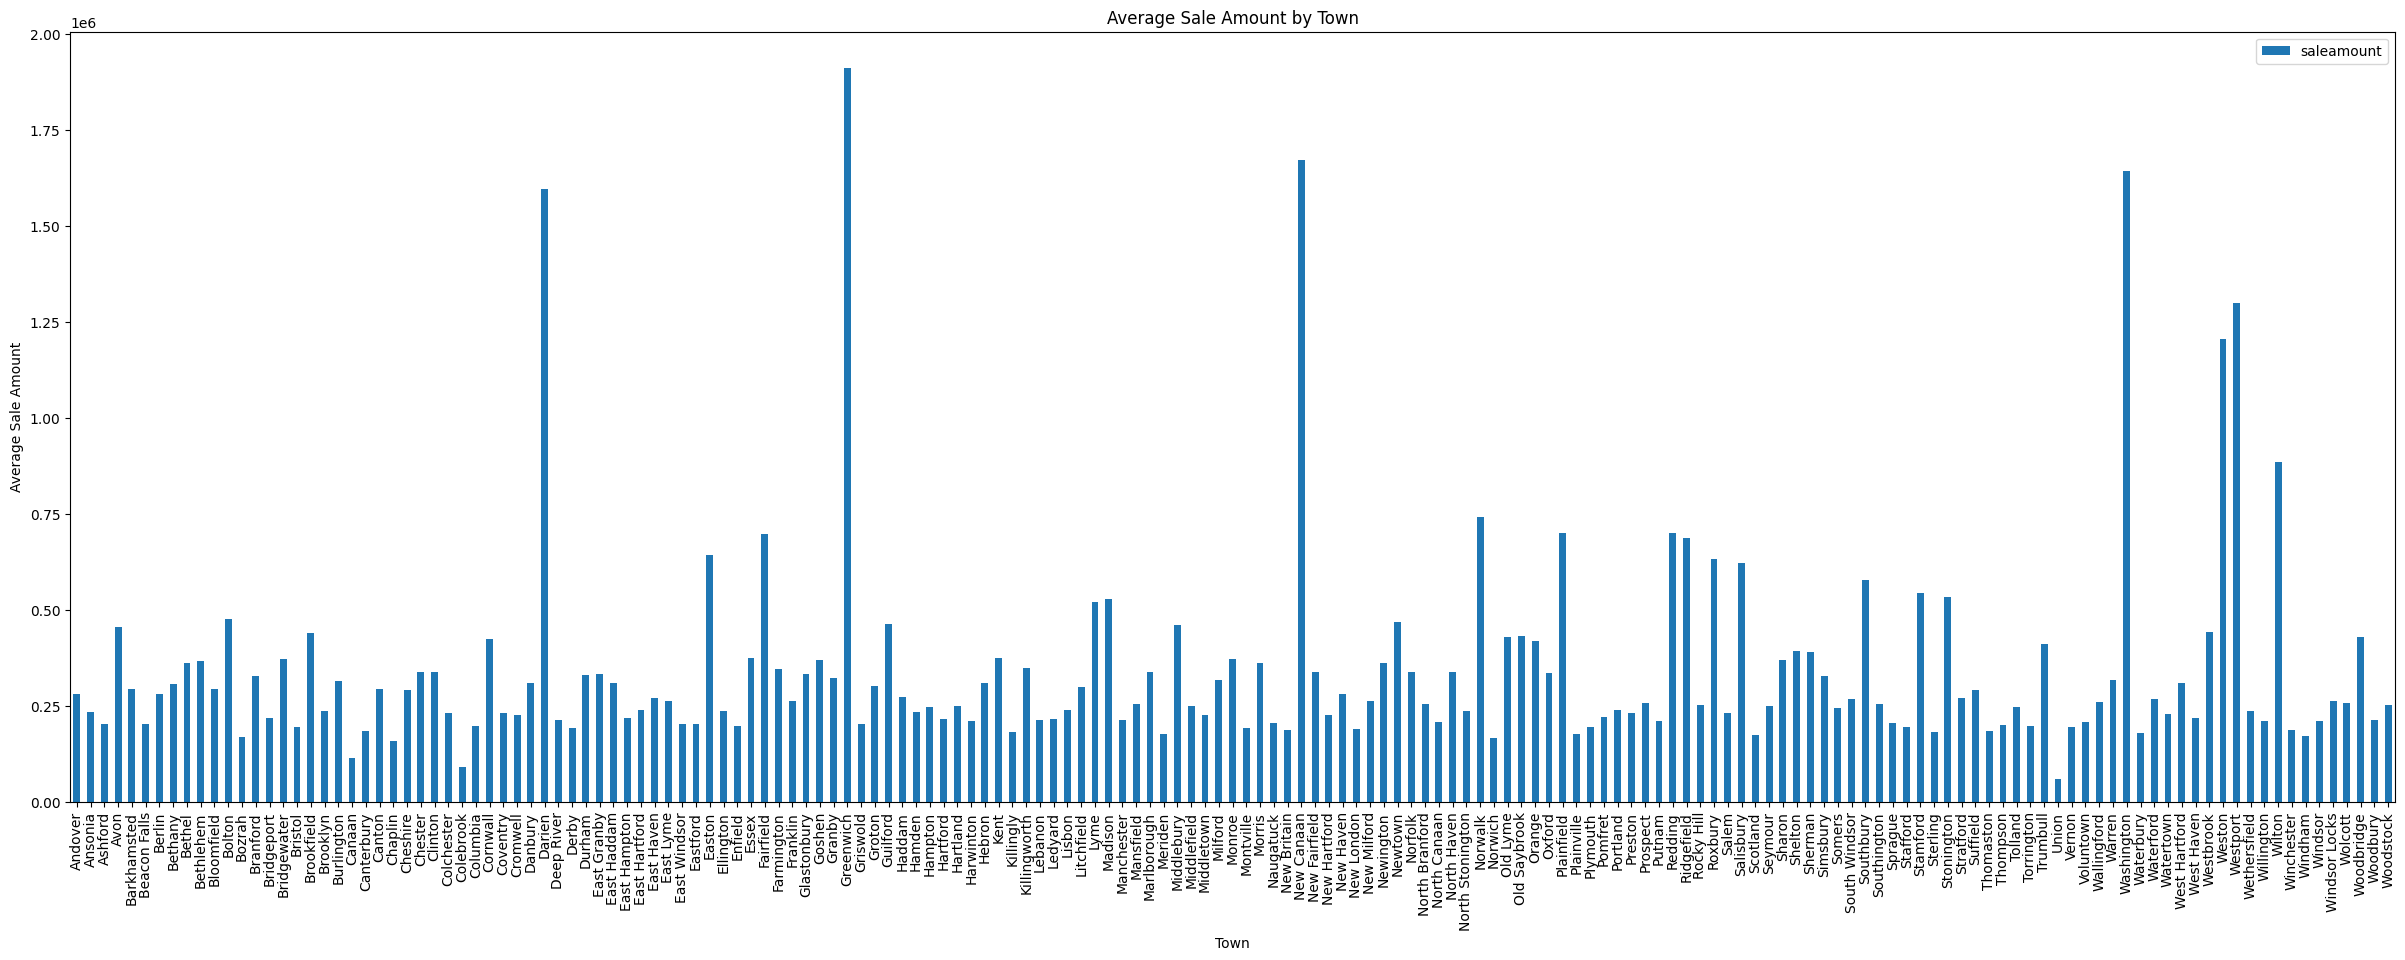

In [ ]:
# make table with just town and saleamount columns
df3 = df_merge[['town', 'saleamount']]

# group by town and average the saleamount
df3 = df3.groupby('town').mean()

# remove the rows where town is '***Unknown***'
df3 = df3[df3.index != '***Unknown***']

df3.head()

# bar graph with town vs saleamount
df3.plot.bar(figsize=(30,10), title='Average Sale Amount by Town')
plt.xlabel('Town')
plt.ylabel('Average Sale Amount')
plt.show()

As we can see from the bar graph above, the average sales amount for homes in most towns is within the ranges of $200,000 and $400,000, a range that is shifted up from the average assessed values' range. From this graph, we can also observe that the towns with a signficantly higher average assessed value of homes, such as Darien, Greenwich, New Canaan, follow with the signficantly higher sales amounts as well.

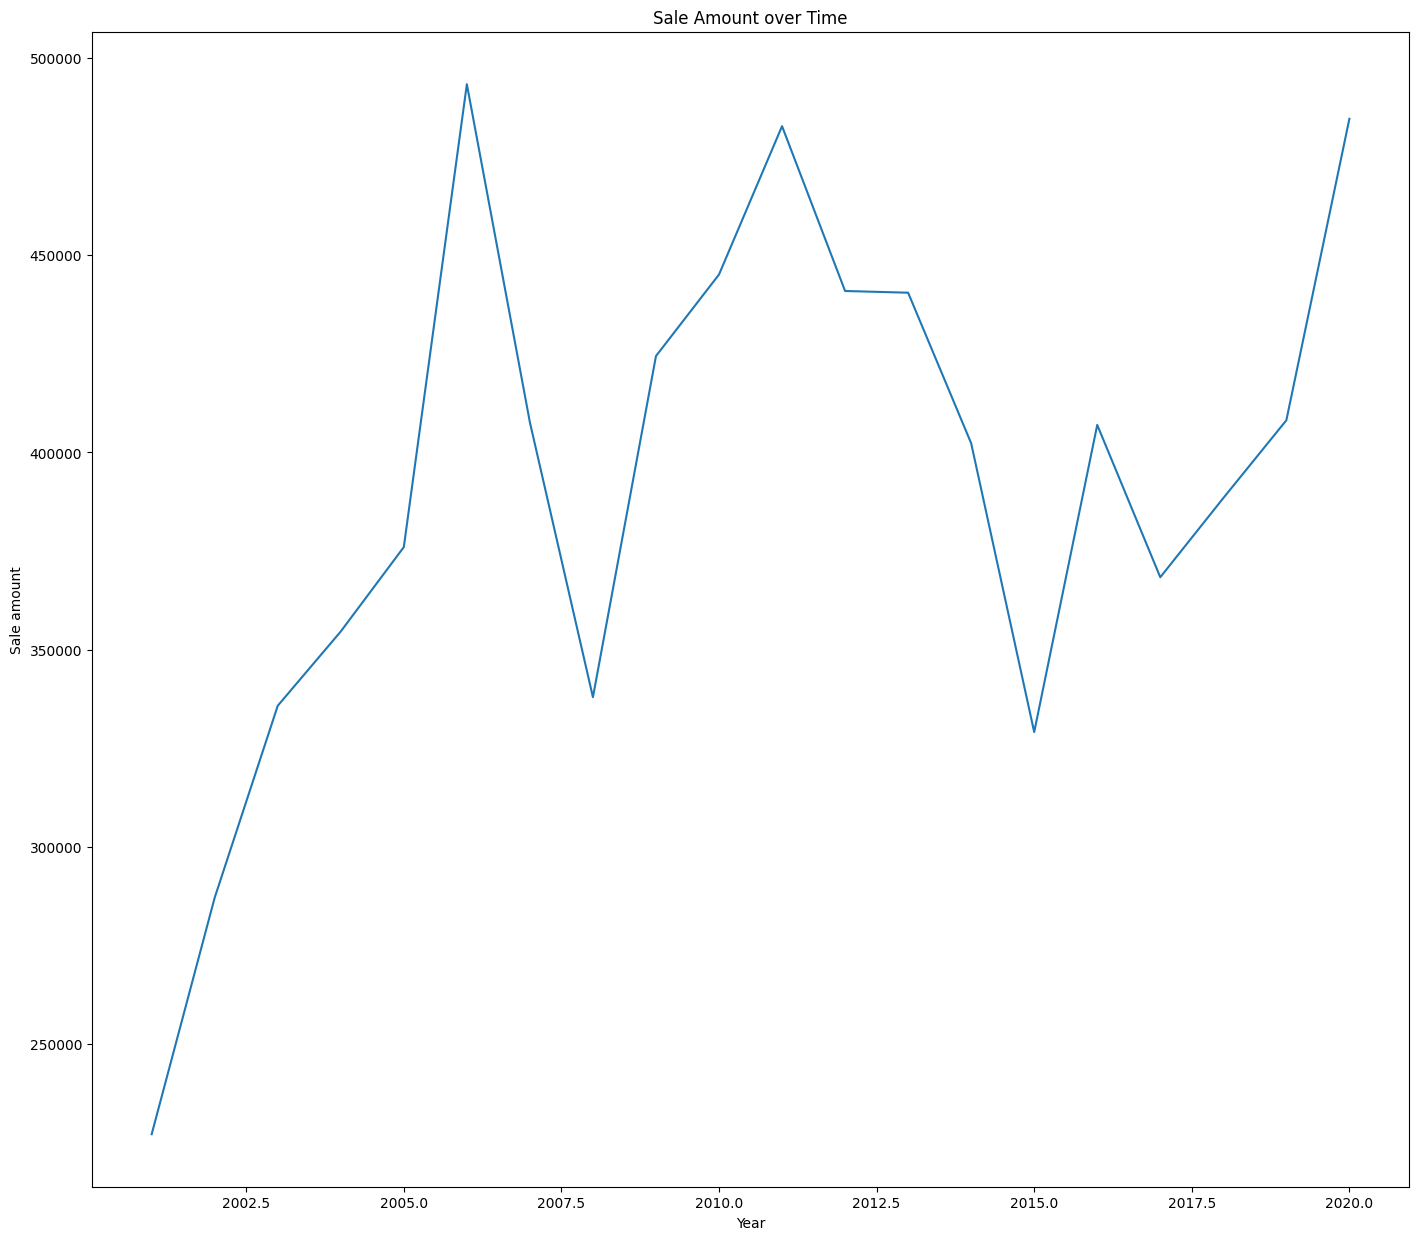

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group the DataFrame by 'listyear' and calculate the mean 'saleamount'
grouped_df = df_merge.groupby('listyear')['saleamount'].mean()

# Get unique years
years = np.unique(df['listyear'])

plt.figure(figsize=(17, 15))
plt.plot(years, grouped_df.values)

plt.xlabel('Year')
plt.ylabel('Sale amount')
plt.title("Sale Amount over Time")

plt.show()

From the graph above, we can see that the housing market had a sharp and steady increase from 2001 to 2006 and dropped sharply afterwards. Then, the market peaked again in 2011 before hitting a low in 2015. Since 2015, the housing sale amounts have slowly increased and have not yet returned to the highest peak around 2006.